# 1 - Perkenalan

Nama      : Muhammad Aji Satrio Wiyogo

Dataset   : Data Churn Customer dari Hacktiv8

Objective : Analisis ini bertujuan untuk memprediksi customer yang akan berhenti ( Churn ) menggunakan algoritma ANN .



# 2 - Import Libraries

In [118]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder,  OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras import Model
from sklearn.impute import SimpleImputer
from scipy.stats import chi2
from sklearn.feature_selection import mutual_info_classif, f_classif
from imblearn.over_sampling import SMOTENC
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization


# 3 - Data Loading

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

---

In [144]:
# 3 - Data Loading
data = pd.read_csv('churn.csv')

In [9]:
#showing head
data.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [10]:
#showing tail
data.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [11]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [12]:
#checking unique data
data.nunique()

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [13]:
#checking data
data.joining_date

0        2017-04-05
1        2017-03-31
2        2017-02-11
3        2015-12-23
4        2015-03-20
            ...    
37005    2015-03-05
37006    2017-01-15
37007    2015-07-11
37008    2016-05-25
37009    2016-10-18
Name: joining_date, Length: 37010, dtype: object

In [14]:
#checking data
data.last_visit_time

0        22:29:49
1        15:44:56
2        20:31:53
3        14:28:05
4        04:16:48
           ...   
37005    09:32:50
37006    02:28:52
37007    17:50:38
37008    17:07:57
37009    03:50:49
Name: last_visit_time, Length: 37010, dtype: object

Dari tabel diatas , column user id, joining date dan last visit time tidak terlalu berpengaruh dalam pembuatan model. Sehingga disini diputuskan untuk membagi tabel joining date kedalam tahun dan bulan, sedangkan last visit time , joining date dan user id di drop

In [145]:
#mengubah kedalam tipe date time
data['joining_date'] = pd.to_datetime(data['joining_date'])

#membuat kolom baru
data['joining_year'] = data['joining_date'].dt.year
data['joining_month'] = data['joining_date'].dt.month
data['joining_year'] = data['joining_year'].astype(str)
data['joining_month'] = data['joining_month'].astype(str)

#drop data
data = data.drop('last_visit_time',axis=1)
data = data.drop('joining_date',axis=1)
data = data.drop('user_id',axis=1)

In [18]:
#checking unique value
data.nunique()

age                                55
gender                              2
region_category                     3
membership_category                 6
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
joining_year                        3
joining_month                      12
dtype: int64

In [19]:
#describe data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


# 4 - Exploratory Data Analysis ( EDA )

In [20]:
proportions = data.groupby('gender')['avg_time_spent'].mean()
proportions.sum()

558.5854059715796

In [21]:
#membuat fungsi countplot
def eda_meanplot(x, y, data):
    feat = x
    hue = y
    hue_type = data[hue].dtype.type
    groups = data[feat].unique()
    proportions = data.groupby(feat)[hue].mean()
    total_percentage = proportions.sum()

    color_palette = sns.color_palette('YlOrBr_r')
    ax = proportions.plot(kind='bar', color=color_palette)


In [22]:
#membuat fungsi countplot
def eda_countplot(x, y, data):
    feat = x
    hue = y
    hue_type = data[hue].dtype.type
    groups = data[feat].dropna().unique()
    data_cleaned = data.dropna(subset=[hue])
    proportions = data_cleaned.groupby(feat)[hue].value_counts(normalize=True).unstack()
    sns.set(style="whitegrid", rc={'figure.figsize': (10, 6)})
    color_palette = sns.color_palette('YlOrBr_r')
    ax = sns.countplot(x=feat, hue=hue, data=data_cleaned, palette=color_palette)
    for c in ax.containers:
        labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
        ax.bar_label(c, labels)

    plt.xlabel(x)
    plt.ylabel('Count')
    plt.title(f'Count Plot: {hue} by {x}')
    plt.legend(title=hue)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=30, ha='right')
    plt.show()


In [23]:
#membuat fungsi displot
def eda_displot(x, y, data):
    sns.kdeplot(data=data, x=x, hue=y, multiple="stack", palette ='YlOrBr_r', alpha=.7, fill = True)
    mode_number = data[data[y] == 1][x].value_counts().idxmax()
    median_number = np.median(data[x])
    plt.text(0.7, 0.6, f'Mode {x}: {mode_number:.2f}\nMedian {x}: {median_number:.2f}', transform=plt.gca().transAxes)
    plt.axvline(mode_number, color='red', linestyle='--', linewidth=1)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.title(f'{x} Distribution with {y} ')

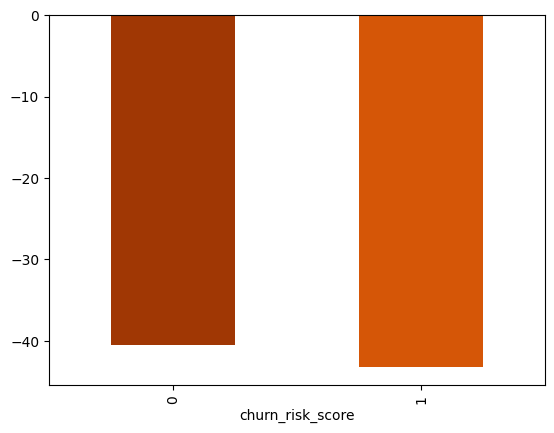

In [24]:
eda_meanplot('churn_risk_score', 'days_since_last_login' , data )

Disini terlihat customer yang churn mempunyai rata rata days_since_last_login yang lebih lama

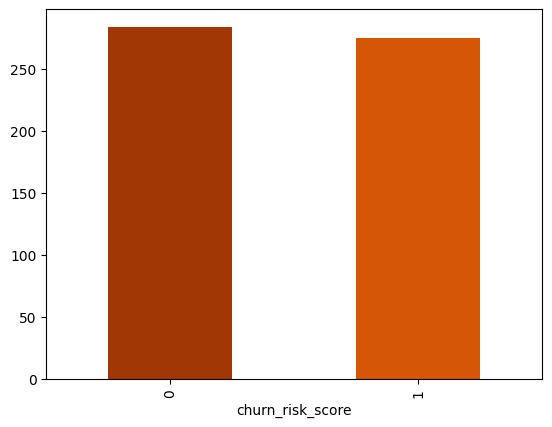

In [25]:
eda_meanplot('churn_risk_score', 'avg_time_spent' , data )

Tidak ada perbedaan signifikan antara perilaku customer menghabiskan waktunya didalam aplikasi dengan kecendrungan customer tersebut churn

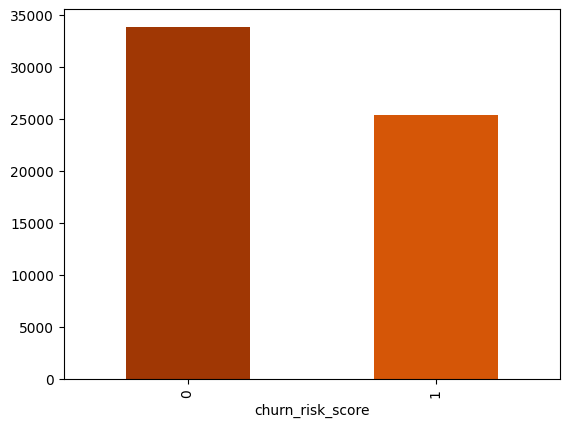

In [26]:
eda_meanplot('churn_risk_score', 'avg_transaction_value' , data )

dari plot diatas customer yang churn memiliki rata rata transaski yang lebih kecil dibandingkan yang tidak

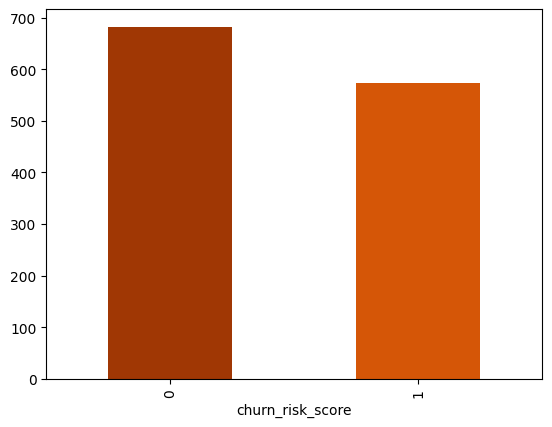

In [28]:
eda_meanplot('churn_risk_score', 'points_in_wallet' , data )

Customer yang churn mempunyai rata rata point in wallet yang lebih rendah dibandingkan yang tidak

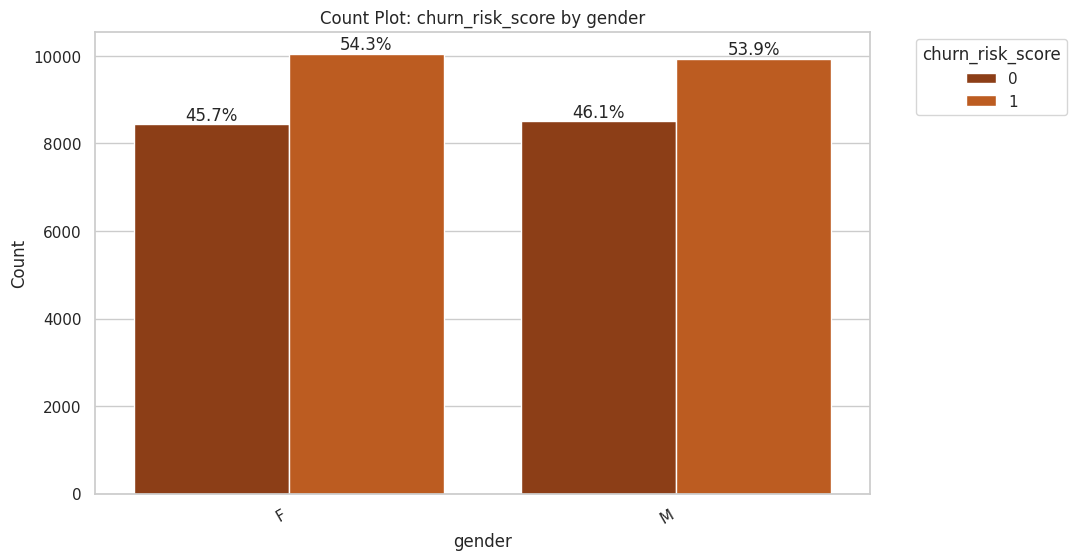

In [30]:
eda_countplot('gender', 'churn_risk_score', data)

Tidak ada perbedaan yang terlalu signifikan antara female dan male terhadap churn

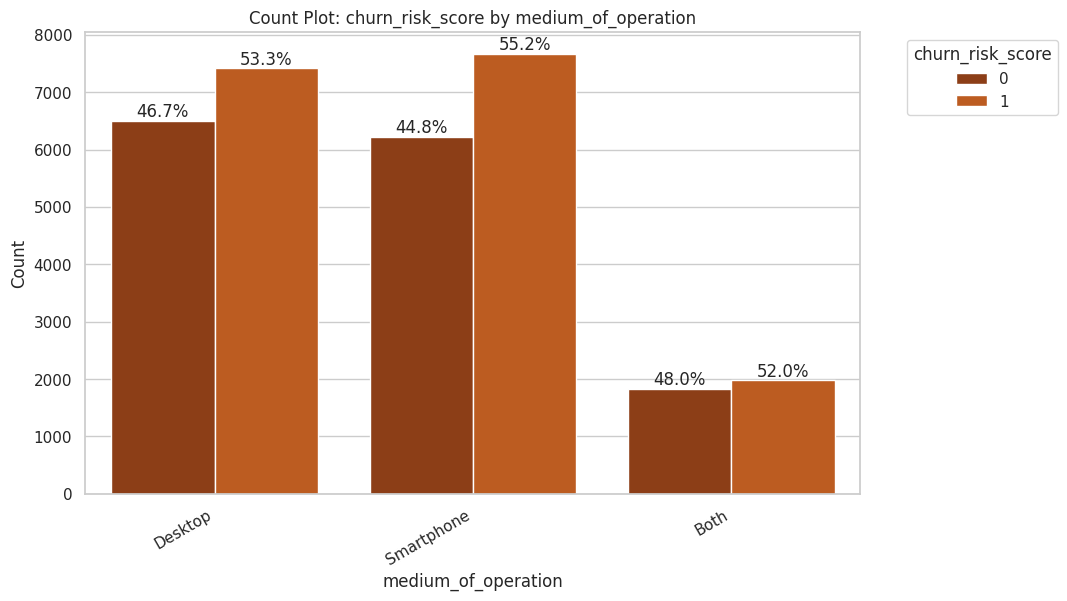

In [141]:
eda_countplot('medium_of_operation', 'churn_risk_score', data)

Terlihat pengguna smartphone memiliki kecendurngan untuk churn lebih tinggi dibanding yang lainnya

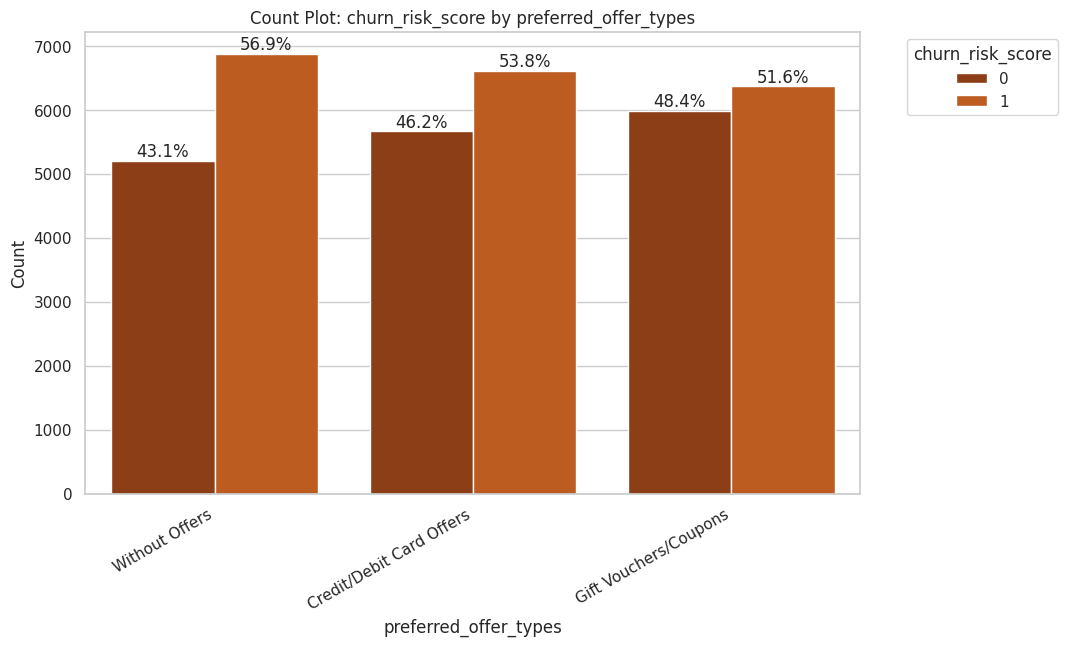

In [33]:
eda_countplot('preferred_offer_types', 'churn_risk_score', data)

Customer yang tidak mendapatkan penawaran sepertinya lebih besar untuk churn dibanndingkan yang tidak

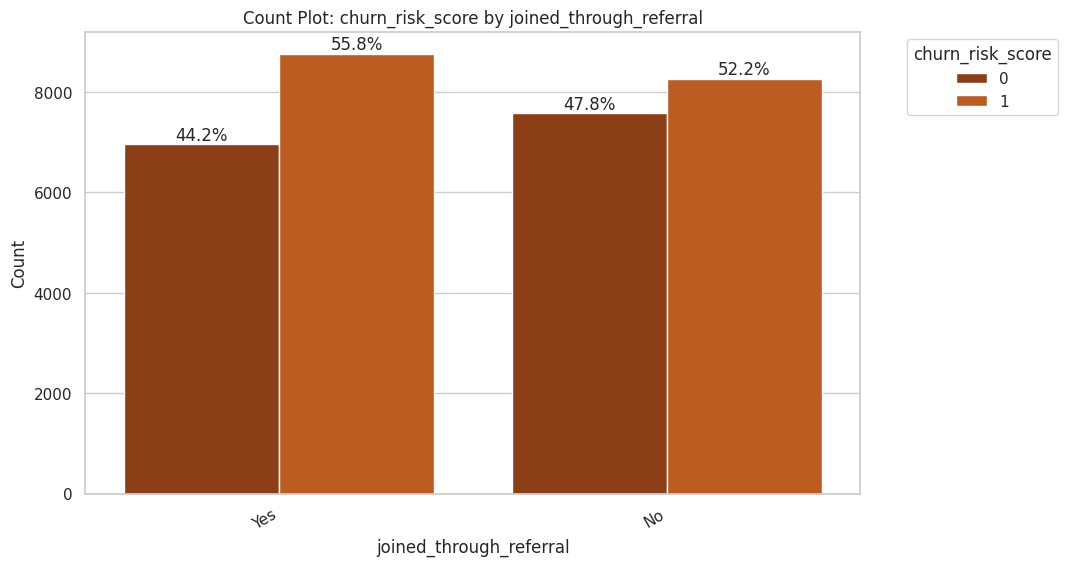

In [34]:
eda_countplot('joined_through_referral', 'churn_risk_score', data)

Disini terlihat orang yang bergabung melalui referal lebih cenderung untuk churn

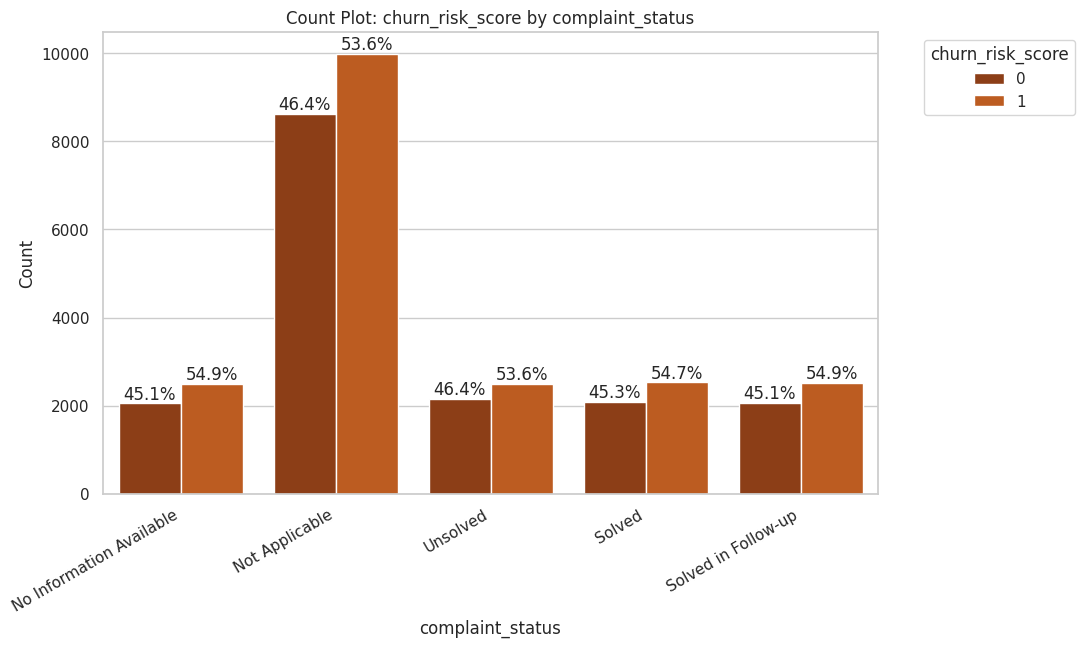

In [35]:
eda_countplot('complaint_status', 'churn_risk_score', data)

Dari masing masing variable sepertinya tidak ada perubahan yang terlalu signifikan

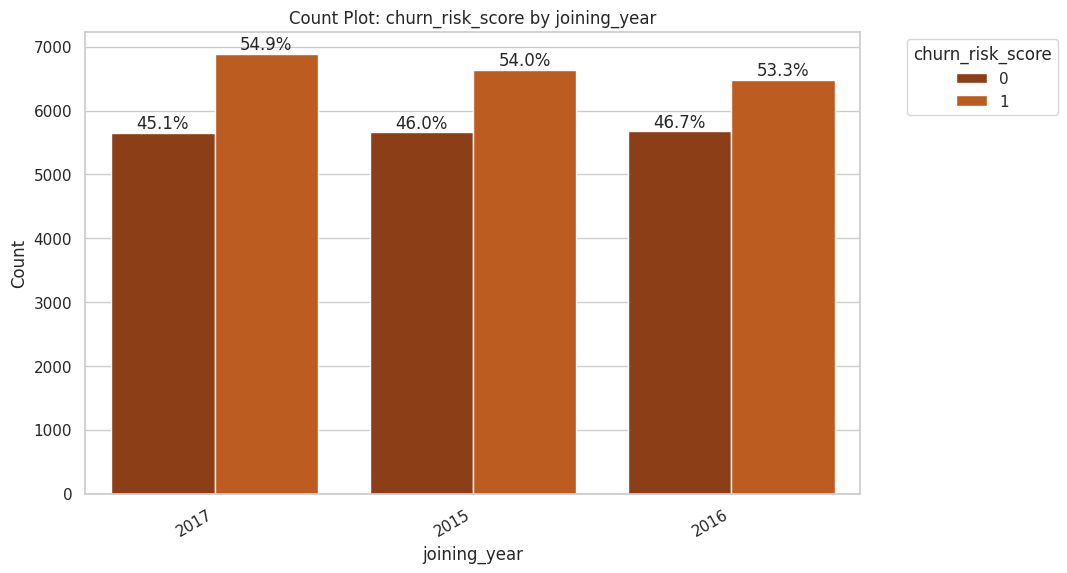

In [149]:
eda_countplot('joining_year', 'churn_risk_score', data)

Disini terlihat ternyata orang yang baru bergabung memiliki kecenderungan untuk churn lebih tinggi dibandingkan yang sudah lama.

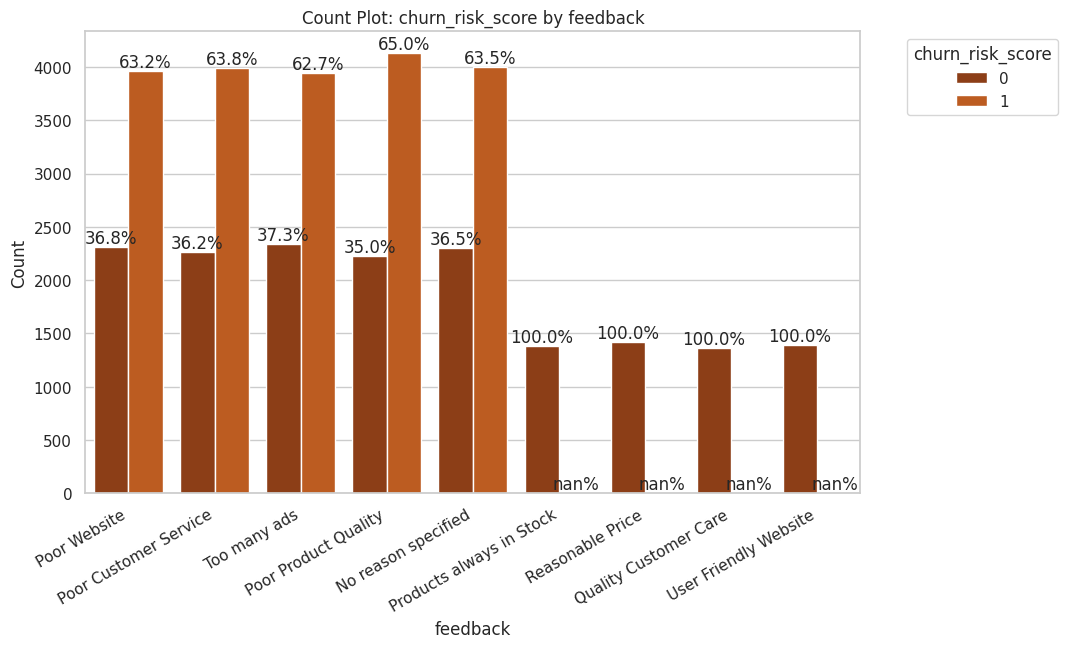

In [36]:
eda_countplot('feedback', 'churn_risk_score', data)

Ada beberapa permasalahan terhadap customer yang churn, disini customer yang memberikan feedback poor website, poor customer service, too many ads , poor product quality, dan no reason specified mempunyai kecendurngan chrun sangat tinggi atau bisa dikatakan apabila feedbacknya buruk , kecendrungan churnnya tinggi

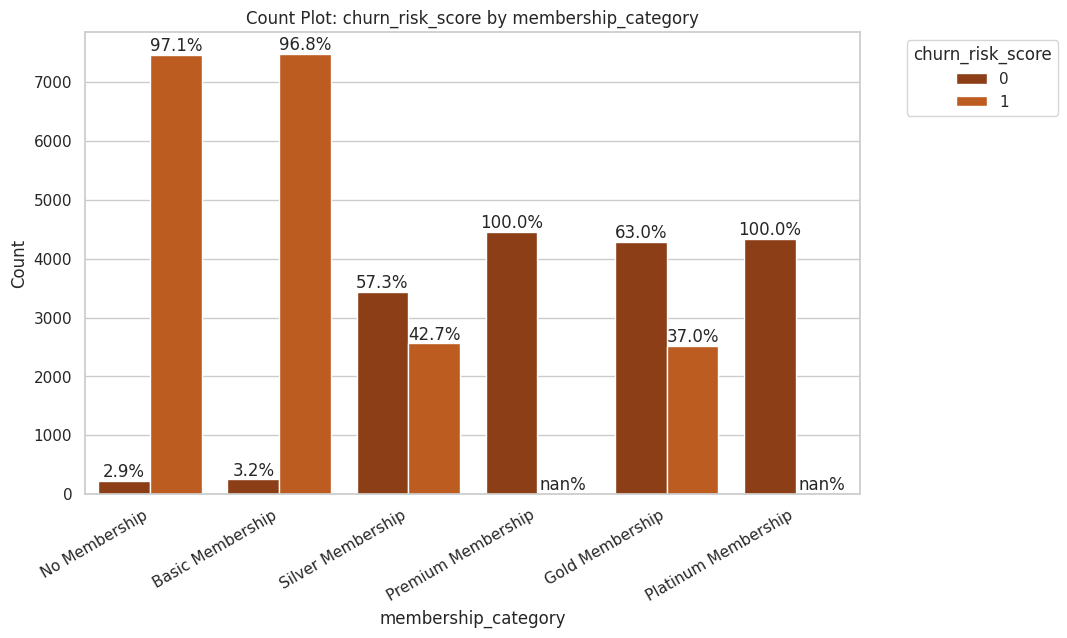

In [37]:
eda_countplot('membership_category', 'churn_risk_score', data)

Dari plot ini terlihat orang yang churn kebanyakan dari customer yang tidak memiliki membership dan basic membership.

In [38]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


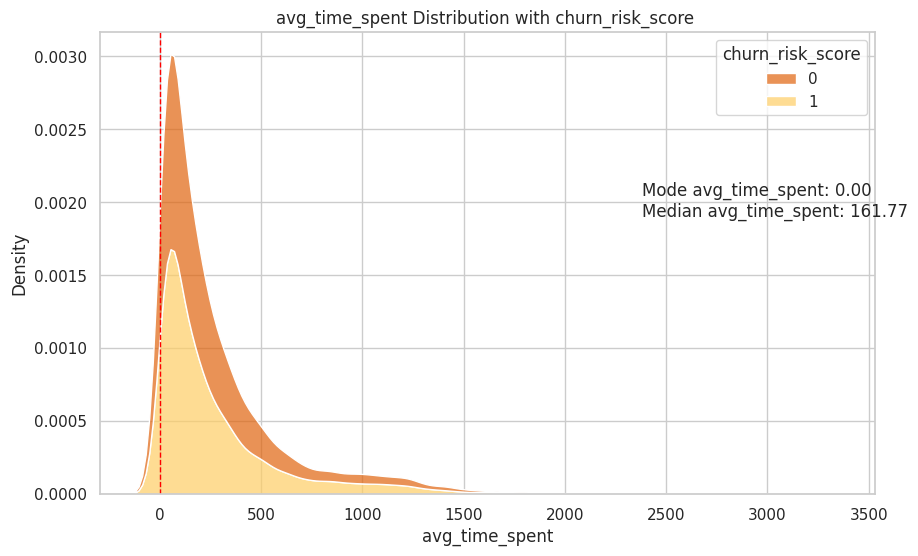

In [40]:
eda_displot('avg_time_spent', 'churn_risk_score', data)

Dapat terlihat orang yang tidak terlalu memakai lama menggunakan applikasi lebih besar untuk churn

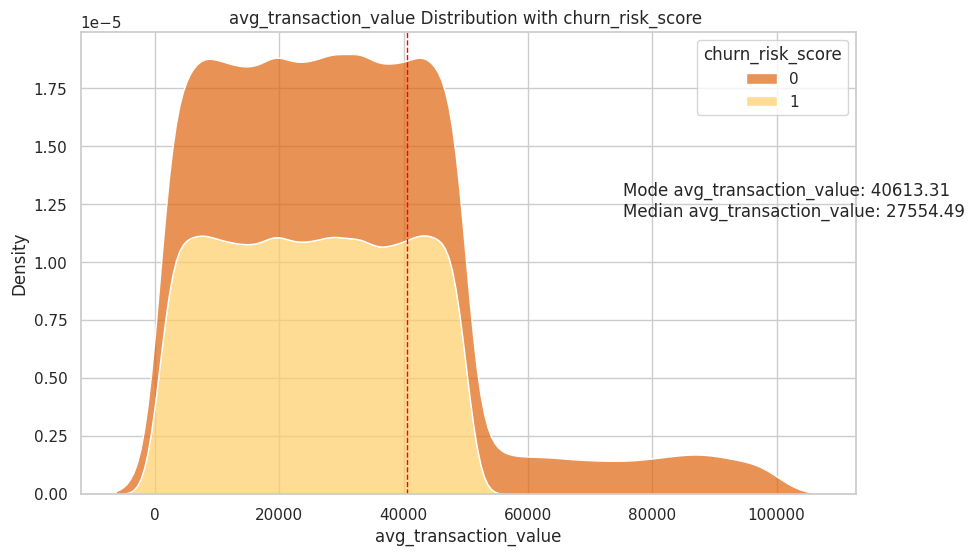

In [41]:
eda_displot('avg_transaction_value', 'churn_risk_score', data)

Dapat terlihat juga customer dengan avg transaksi <60000 mempunyai kecendrungan untuk churn

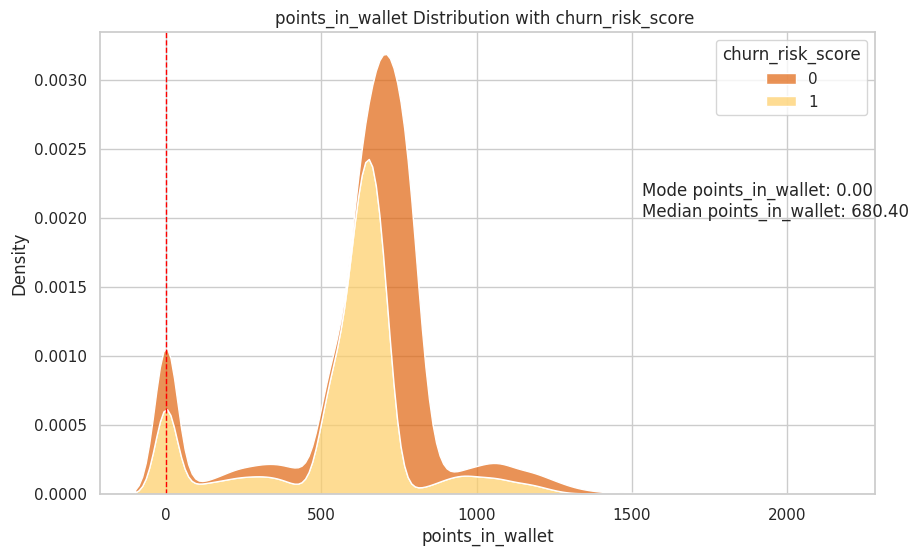

In [43]:
eda_displot('points_in_wallet', 'churn_risk_score', data)

Dapat terlihat customer yang memiliki point wallet rendah cenderung untuk mengalami churn

# 5 Feature Engineering

Setelah dilakukan exploratory data, disini akan dilakukan feature engineering

## 5.1 Splitting between Train-Set, Val-Set, and Test-Set

In [45]:
# Splitting between X and y

X  = data.drop(['churn_risk_score'], axis = 1)
y = data['churn_risk_score']

In [46]:
# Spltting between Train-set, Val-set, and Test set

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.15, random_state = 13 )
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state = 13)

In [47]:
#checking shape
print('Train size : ', X_train.shape)
print('Val size : ', X_val.shape)
print('Test size : ', X_test.shape)

Train size :  (26739, 20)
Val size :  (4719, 20)
Test size :  (5552, 20)


## 5.2 Handling Outliers

In [48]:
#define cat dan num features

cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

 Value skewness of age  :  -0.010265773937540284
 Value skewness of days_since_last_login  :  -3.934856772382823
 Value skewness of avg_time_spent  :  2.3037142881567787
 Value skewness of avg_transaction_value  :  1.0142926668002228
 Value skewness of avg_frequency_login_days  :  0.3928504069689131
 Value skewness of points_in_wallet  :  -0.7512729196243495


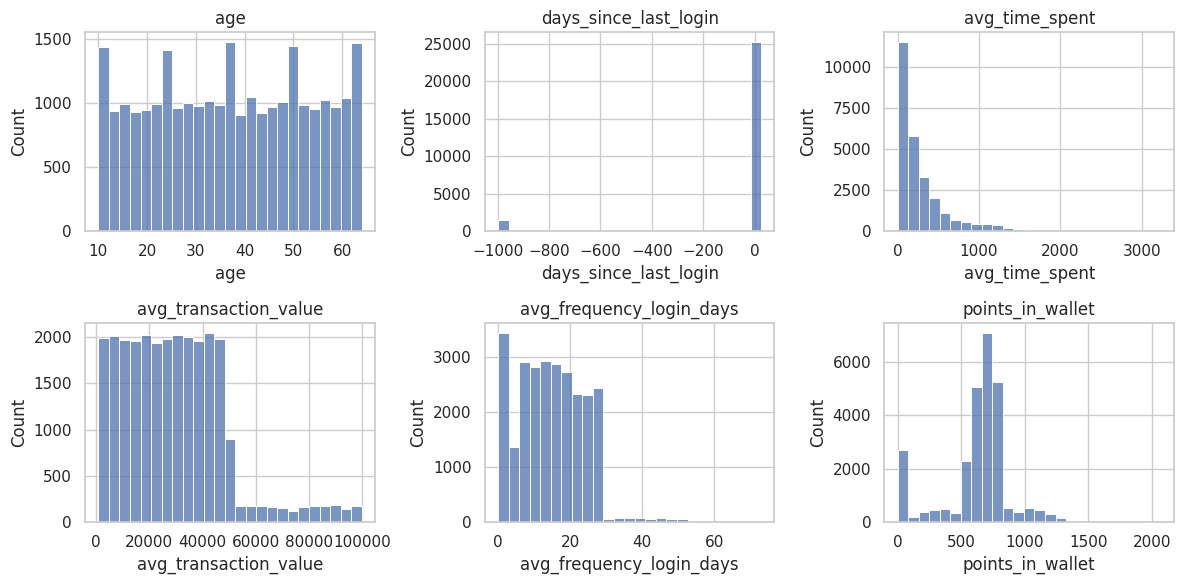

In [49]:
#menampilkan distribusi data pada feature
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, col in enumerate(num_features):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(data=X_train[col], bins=25, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
    print(f' Value skewness of {col}  : ', X_train[col].skew())
plt.tight_layout()
plt.show()

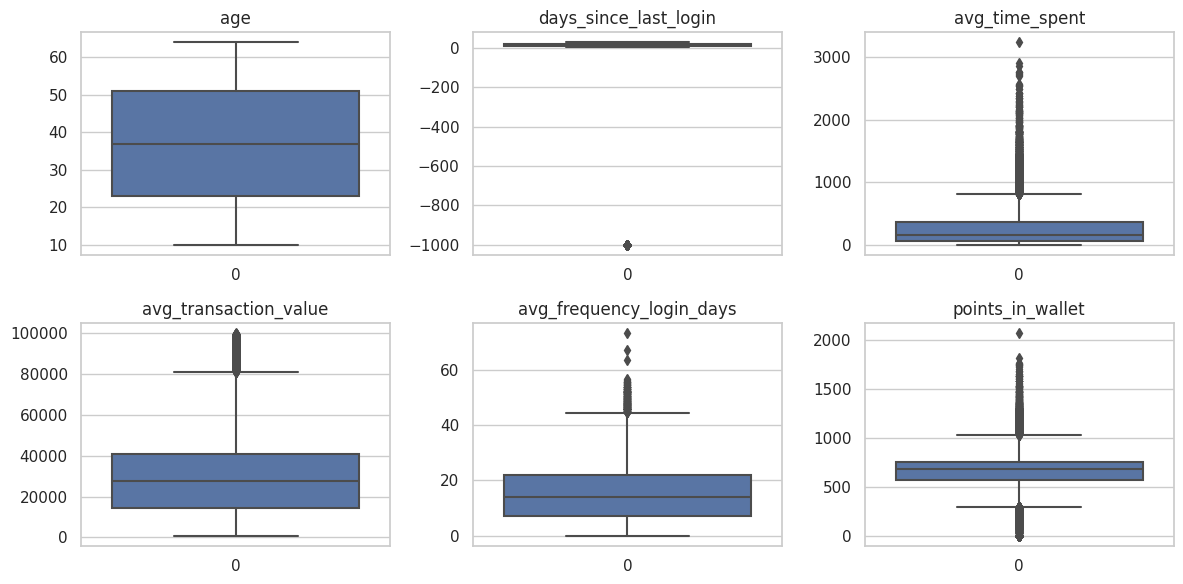

In [50]:
#checking outliers
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, col in enumerate(num_features):
    row_idx = i // 3
    col_idx = i % 3
    sns.boxplot(data=X_train[col],  ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
plt.tight_layout()
plt.show()

Dari hasil yang ditemukan, dapat dikatakan semua feature diatas mempunyai data distribusi yang tidak normal. Dari hasil yang lain feature age tidak mempunyai outliers sehingga bisa kita exclude kan

In [51]:
#fungsi distribusi tidak normal
def not_normal_dis (df, feature , distance):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    low_boundary = df[feature].quantile(0.25) - (IQR * distance)
    up_boundary = df[feature].quantile(0.75) + (IQR * distance)
    return up_boundary, low_boundary

In [52]:
#checking persentase outliers
for feat in num_features:
    up_boundary, low_boundary = not_normal_dis(data, feat, 1.5)
    total_data = len(data)
    total_outliers_up = len(data[data[feat] > up_boundary])
    total_outliers_low = len(data[data[feat] < low_boundary])
    percentage_outliers_up = (total_outliers_up / total_data) * 100
    percentage_outliers_low = (total_outliers_low / total_data) * 100

    print('Total {}: {}'.format(feat, total_data))
    print('Total upper Outliers of {}: {}'.format(feat, total_outliers_up))
    print('% Total upper Outliers of {}: {:.2f}%'.format(feat, percentage_outliers_up))
    print('Total lower Outliers of {}: {}'.format(feat, total_outliers_low))
    print('% Total lower Outliers of {}: {:.2f}%'.format(feat, percentage_outliers_low))
    print('')


Total age: 37010
Total upper Outliers of age: 0
% Total upper Outliers of age: 0.00%
Total lower Outliers of age: 0
% Total lower Outliers of age: 0.00%

Total days_since_last_login: 37010
Total upper Outliers of days_since_last_login: 0
% Total upper Outliers of days_since_last_login: 0.00%
Total lower Outliers of days_since_last_login: 2001
% Total lower Outliers of days_since_last_login: 5.41%

Total avg_time_spent: 37010
Total upper Outliers of avg_time_spent: 3112
% Total upper Outliers of avg_time_spent: 8.41%
Total lower Outliers of avg_time_spent: 0
% Total lower Outliers of avg_time_spent: 0.00%

Total avg_transaction_value: 37010
Total upper Outliers of avg_transaction_value: 1131
% Total upper Outliers of avg_transaction_value: 3.06%
Total lower Outliers of avg_transaction_value: 0
% Total lower Outliers of avg_transaction_value: 0.00%

Total avg_frequency_login_days: 37010
Total upper Outliers of avg_frequency_login_days: 261
% Total upper Outliers of avg_frequency_login_da

Ternyata outlier terbanyak berada di point in wallet, sedangkan pada feature lainnya dibawah 6%. Karena pada semua feature yang dilakukan outlier cheeck memiliki distribusi data yang tidak normal maka dilakukan replacement outliers menggunakan median

In [53]:
#copy data
X_train_out = X_train.copy()
X_val_out = X_val.copy()
X_test_out = X_test.copy()

#define variabel
X_total = [X_train_out, X_val_out, X_test_out]

#mengganti semua outlier yang ada pada feature dengan median
for feat in num_features:
    up_boundary, low_boundary = not_normal_dis(X_train_out, feat, 1.5)
    for X_data in X_total:
        X_data[feat] = np.where(X_data[feat] > up_boundary, X_data[feat].median(), X_data[feat])
        X_data[feat] = np.where(X_data[feat] < low_boundary, X_data[feat].median(), X_data[feat])


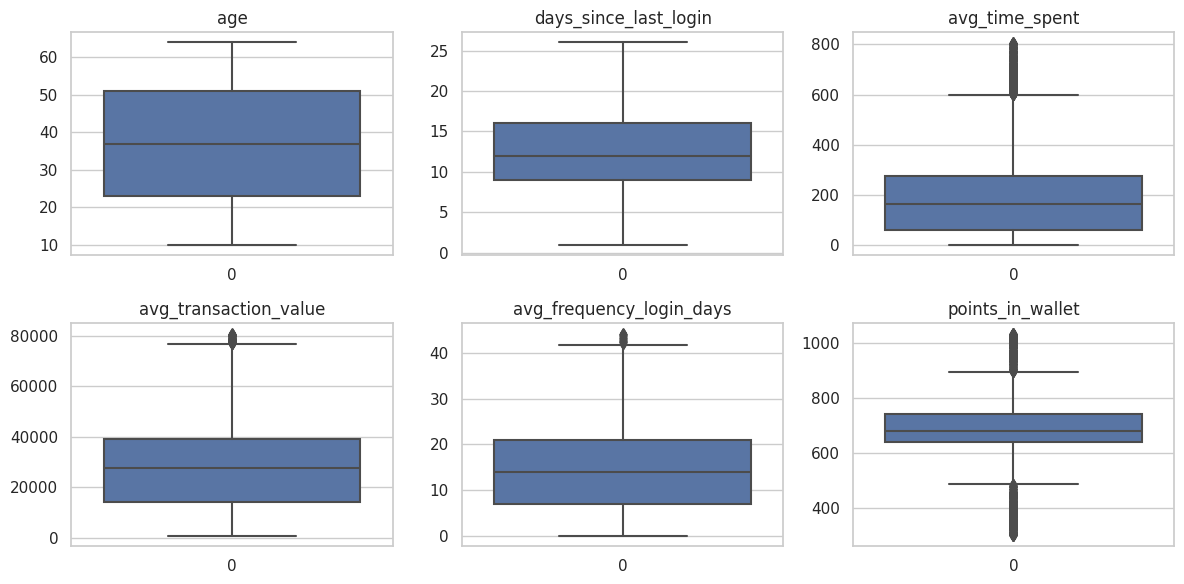

In [54]:
#checking outliers
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, col in enumerate(num_features):
    row_idx = i // 3
    col_idx = i % 3
    sns.boxplot(data=X_train_out[col],  ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
plt.tight_layout()
plt.show()

In [55]:
#cheking persentase outliers
for feat in num_features:
    up_boundary, low_boundary = not_normal_dis(X_train_out, feat, 1.5)
    total_data = len(X_train_out)
    total_outliers_up = len(X_train_out[X_train_out[feat] > up_boundary])
    total_outliers_low = len(X_train_out[X_train_out[feat] < low_boundary])
    percentage_outliers_up = (total_outliers_up / total_data) * 100
    percentage_outliers_low = (total_outliers_low / total_data) * 100

    print('Total {}: {}'.format(feat, total_data))
    print('Total upper Outliers of {}: {}'.format(feat, total_outliers_up))
    print('% Total upper Outliers of {}: {:.2f}%'.format(feat, percentage_outliers_up))
    print('Total lower Outliers of {}: {}'.format(feat, total_outliers_low))
    print('% Total lower Outliers of {}: {:.2f}%'.format(feat, percentage_outliers_low))
    print('')

Total age: 26739
Total upper Outliers of age: 0
% Total upper Outliers of age: 0.00%
Total lower Outliers of age: 0
% Total lower Outliers of age: 0.00%

Total days_since_last_login: 26739
Total upper Outliers of days_since_last_login: 0
% Total upper Outliers of days_since_last_login: 0.00%
Total lower Outliers of days_since_last_login: 0
% Total lower Outliers of days_since_last_login: 0.00%

Total avg_time_spent: 26739
Total upper Outliers of avg_time_spent: 1163
% Total upper Outliers of avg_time_spent: 4.35%
Total lower Outliers of avg_time_spent: 0
% Total lower Outliers of avg_time_spent: 0.00%

Total avg_transaction_value: 26739
Total upper Outliers of avg_transaction_value: 174
% Total upper Outliers of avg_transaction_value: 0.65%
Total lower Outliers of avg_transaction_value: 0
% Total lower Outliers of avg_transaction_value: 0.00%

Total avg_frequency_login_days: 26739
Total upper Outliers of avg_frequency_login_days: 62
% Total upper Outliers of avg_frequency_login_days: 0

Outliers pada kebanyakan feature sudah berkurang.

## 5.3 Handling Missing Values

Pada sesi ini dilakukan handing missing values terhadap feature featurenya

In [57]:
# Checking Missing Values on data
data.isnull().sum()

age                                0
gender                            59
region_category                 5431
membership_category                0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
joining_year                       0
joining_month                      0
dtype: int64

In [59]:
# Checking Missing Values on X_train
X_train_out.isnull().sum()

age                                0
gender                            36
region_category                 3936
membership_category                0
joined_through_referral         3968
preferred_offer_types            213
medium_of_operation             3915
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
joining_year                       0
joining_month                      0
dtype: int64

In [60]:
# Checking Missing Values on X_val
X_val_out.isnull().sum()

age                               0
gender                           13
region_category                 678
membership_category               0
joined_through_referral         699
preferred_offer_types            30
medium_of_operation             686
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
joining_year                      0
joining_month                     0
dtype: int64

In [61]:
# Checking Missing Values on X_out
X_test_out.isnull().sum()

age                               0
gender                           10
region_category                 817
membership_category               0
joined_through_referral         775
preferred_offer_types            45
medium_of_operation             794
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
joining_year                      0
joining_month                     0
dtype: int64

In [62]:
#copy data
data_miss = data.copy()

In [63]:
missing_feat = ['gender' ,'region_category' ,'joined_through_referral' ,'preferred_offer_types' ,'medium_of_operation']
for col in missing_feat:
    missing_main = (data_miss[col].isnull().sum() / len(data_miss)) * 100
    missing_train = (X_train_out[col].isnull().sum() / len(X_train_out)) * 100
    missing_val = (X_val_out[col].isnull().sum() / len(X_val_out)) * 100
    missing_test = (X_test_out[col].isnull().sum() / len(X_test_out)) * 100
    print(f"missing main {col}: {missing_main:.2f}%")
    print(f"missing train {col}: {missing_train:.2f}%")
    print(f"missing val {col}: {missing_val:.2f}%")
    print(f"missing col {col}: {missing_test:.2f}%")


missing main gender: 0.16%
missing train gender: 0.13%
missing val gender: 0.28%
missing col gender: 0.18%
missing main region_category: 14.67%
missing train region_category: 14.72%
missing val region_category: 14.37%
missing col region_category: 14.72%
missing main joined_through_referral: 14.70%
missing train joined_through_referral: 14.84%
missing val joined_through_referral: 14.81%
missing col joined_through_referral: 13.96%
missing main preferred_offer_types: 0.78%
missing train preferred_offer_types: 0.80%
missing val preferred_offer_types: 0.64%
missing col preferred_offer_types: 0.81%
missing main medium_of_operation: 14.58%
missing train medium_of_operation: 14.64%
missing val medium_of_operation: 14.54%
missing col medium_of_operation: 14.30%


Terlihat ada 3 feature yang memiliki missing value yang lumayan besar dibandingkan feature feature lainnya. Langkah selanjutnya menentukan apakah feature feature tersebut memiliki kecendrungan untuk MAR, MCAR, MNAR.

In [64]:
#checking probability
data_miss['gender_null'] = np.where(data_miss.gender.isnull(), 1, 0)
print('Value Counts')
print(data_miss.groupby(['churn_risk_score'])['gender_null'].value_counts())
print('\nMean')
print(data_miss.groupby(['churn_risk_score'])['gender_null'].mean())

Value Counts
churn_risk_score  gender_null
0                 0              16962
                  1                 30
1                 0              19989
                  1                 29
Name: gender_null, dtype: int64

Mean
churn_risk_score
0    0.001766
1    0.001449
Name: gender_null, dtype: float64


Tidak terlalu banyak informasi yang bisa disimpulkan

In [65]:
#checking probability

data_miss['region_category_null'] = np.where(data_miss.region_category.isnull(), 1, 0)
print('Value Counts')
print(data_miss.groupby(['churn_risk_score'])['region_category_null'].value_counts())
print('\nMean')
print(data_miss.groupby(['churn_risk_score'])['region_category_null'].mean())

Value Counts
churn_risk_score  region_category_null
0                 0                       14540
                  1                        2452
1                 0                       17039
                  1                        2979
Name: region_category_null, dtype: int64

Mean
churn_risk_score
0    0.144303
1    0.148816
Name: region_category_null, dtype: float64


Tidak terlalu banyak informasi yang bisa disimpulkan

In [66]:
#checking probability

data_miss['joined_through_referral_null'] = np.where(data_miss.joined_through_referral.isnull(), 1, 0)
print('Value Counts')
print(data_miss.groupby(['churn_risk_score'])['joined_through_referral_null'].value_counts())
print('\nMean')
print(data_miss.groupby(['churn_risk_score'])['joined_through_referral_null'].mean())

Value Counts
churn_risk_score  joined_through_referral_null
0                 0                               14537
                  1                                2455
1                 0                               17031
                  1                                2987
Name: joined_through_referral_null, dtype: int64

Mean
churn_risk_score
0    0.144480
1    0.149216
Name: joined_through_referral_null, dtype: float64


Tidak terlalu banyak informasi yang bisa disimpulkan

In [67]:
#checking probability

data_miss['preferred_offer_types_null'] = np.where(data_miss.preferred_offer_types.isnull(), 1, 0)
print('Value Counts')
print(data_miss.groupby(['churn_risk_score'])['preferred_offer_types_null'].value_counts())
print('\nMean')
print(data_miss.groupby(['churn_risk_score'])['preferred_offer_types_null'].mean())

Value Counts
churn_risk_score  preferred_offer_types_null
0                 0                             16861
                  1                               131
1                 0                             19861
                  1                               157
Name: preferred_offer_types_null, dtype: int64

Mean
churn_risk_score
0    0.007710
1    0.007843
Name: preferred_offer_types_null, dtype: float64


Tidak terlalu banyak informasi yang bisa disimpulkan

In [68]:
#checking probability

data_miss['medium_of_operation_null'] = np.where(data_miss.medium_of_operation.isnull(), 1, 0)
print('Value Counts')
print(data_miss.groupby(['churn_risk_score'])['medium_of_operation_null'].value_counts())
print('\nMean')
print(data_miss.groupby(['churn_risk_score'])['medium_of_operation_null'].mean())

Value Counts
churn_risk_score  medium_of_operation_null
0                 0                           14547
                  1                            2445
1                 0                           17068
                  1                            2950
Name: medium_of_operation_null, dtype: int64

Mean
churn_risk_score
0    0.143891
1    0.147367
Name: medium_of_operation_null, dtype: float64


Secara keseluruhan pemeriksaan berdasarkan probabilitas missing value terhadap churnnya , sepertinya tidak dapat dipastikan sepenuhnya tentang karakteristik datanya. Meskipun terlihat total missing value terhadap nilai churn 0 dan 1 hampir sama nilainya, atau bisa dikatakn ada kemungkinan untuk Missing at completely at random namun butuh analisis lainnya

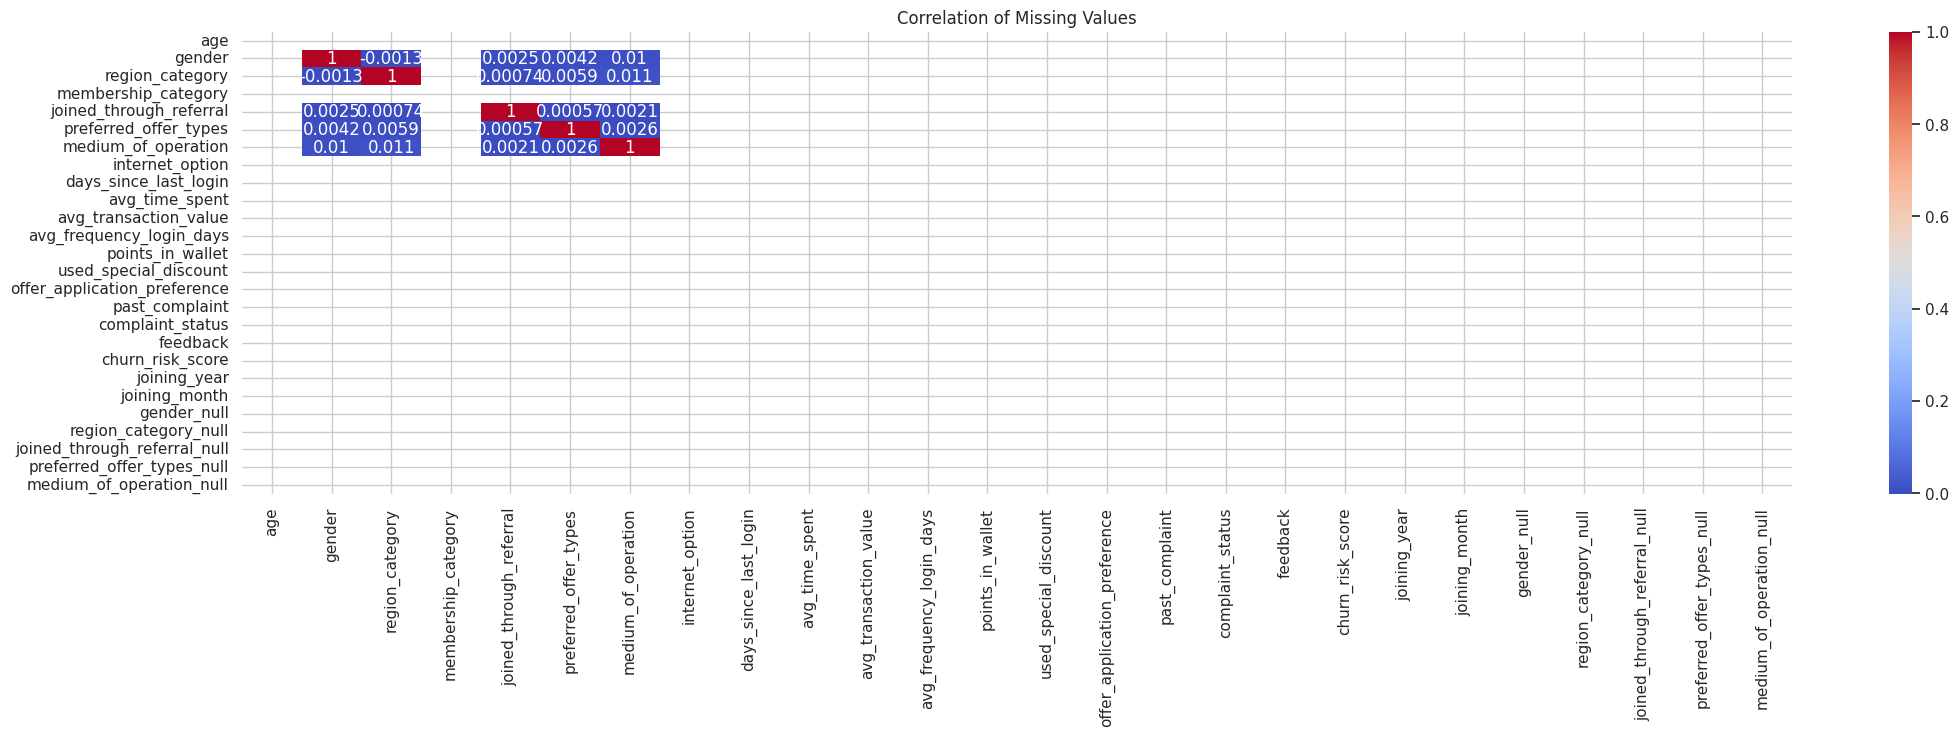

In [70]:
#checking corelation

missing_binary = data_miss.isnull()
correlation_matrix = missing_binary.corr()
plt.figure(figsize=(25, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation of Missing Values")
plt.show()

Berdasrkan analisis korelasi sepertinya antar feature yang memiliki missing value tidak mempunyai korelasi yang kuat, sehingga kemungkinan besar dikatakan MCAR

Untuk meyakinkan asumsi diatas dilakukan kembali chitest untuk missing value

In [72]:
#defining chitest for missing value

def little_mcar_test(data, alpha=0.05):
    p_m = data.isnull().mean()
    p_c = data.dropna().shape[0] / data.shape[0]
    R_c = data.dropna().corr()
    R_all = data.corr()
    R_diff = R_all - R_c
    V_Rdiff = np.var(R_diff, ddof=1)
    E_Rdiff = (1 - p_c) / (1 - p_m).sum()
    T = np.trace(R_diff) / np.sqrt(V_Rdiff * E_Rdiff)
    df = data.shape[1] * (data.shape[1] - 1) / 2
    p_value = 1 - chi2.cdf(T ** 2, df)
    missingness_matrix = data.isnull().astype(int)
    return missingness_matrix, p_value

In [73]:
missingness_matrix, p_value = little_mcar_test(data, alpha=0.05)
p_value

<ipython-input-72-235ff65c4a75>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  R_c = data.dropna().corr()
<ipython-input-72-235ff65c4a75>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  R_all = data.corr()


array([1., 1., 1., 1., 1., 1., 1.])

Dari hasil diatas memang ternyata masing masing feature tidak mempunyai hubungan yang kuat , sehingga kemungkinan besar memang missing value pada feature ini dapat dikategorikan MCAR.

In [74]:
#copy data
X_train_out_ms = X_train_out.copy()
X_val_out_ms = X_val_out.copy()
X_test_out_ms = X_test_out.copy()

Karena berdasarkan asumsi berserta test dilakukan karakteristik missing valuenya adalah MCAR , dan ada 3 feature yang memiliki missing value yang besar. Maka ke 3 feature tersebut dilakukan drop rownya, sementara ke 2 feature lainnya yaitu gender dan prefered offer types akan dinputkan dengan nilai modus , karena tipe datanya yang kategorikal

In [77]:
#splitting colum ,imputing , & dropping

col_1 = ['gender', 'preferred_offer_types']
col_2 = ['region_category' , 'joined_through_referral' ,'medium_of_operation']

mode_input = SimpleImputer(strategy="most_frequent")
mode_input.fit(X_train_out_ms[col_1])

X_train_out_ms[col_1] = mode_input.transform(X_train_out_ms[col_1])
X_val_out_ms[col_1] = mode_input.transform(X_val_out_ms[col_1])
X_test_out_ms[col_1] = mode_input.transform(X_test_out_ms[col_1])

In [78]:
X_train_out_ms = X_train_out_ms.dropna()
X_val_out_ms = X_val_out_ms.dropna()
X_test_out_ms = X_test_out_ms.dropna()
y_train = y_train.loc[X_train_out_ms.index]
y_val = y_val.loc[X_val_out_ms.index]
y_test = y_test.loc[X_test_out_ms.index]

## 5.4 - Feature Selection


Setelah sesi handling missing value, dilakukan feature selection terhadap masing masing feature.
Disini saya melakukan feature selection untuk data numerical menggunakan korelation test, sedangkan untuk data categorical digunakan testing fclass_if , dan mutual_class_if yang ada pada modul sckit learn feature selection

In [79]:
#copy data
fs = X_train_out_ms.copy()
fs_cat = X_train_out_ms[cat_features]
fs_num = X_train_out_ms[num_features]
fs_num['churn_risk_score'] = y_train

<ipython-input-79-cd0c717546e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs_num['churn_risk_score'] = y_train


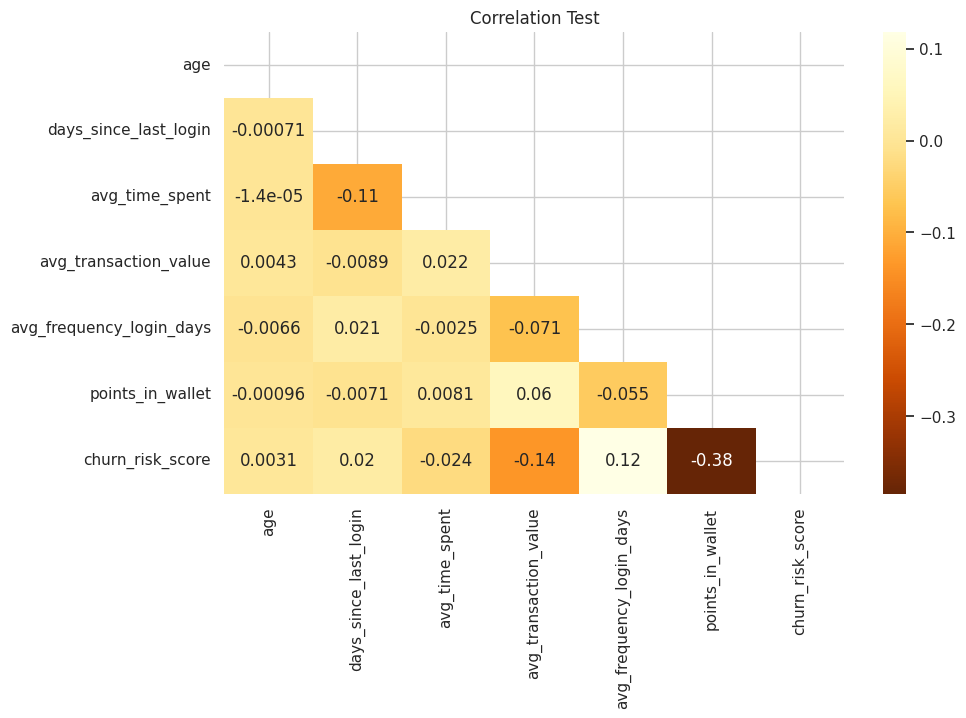

In [80]:
#membuat korelasi test
plt.figure(figsize=(10, 6))
corr_matrix = fs_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap ='YlOrBr_r' )
plt.title('Correlation Test')
plt.show()

Dari korelasi test terlihat tidak ada korelasi yang tinggi antara feature featurenya, sehingga dari feature feature tersebut tidak perlu di drop featurenya.
Terhadap target sepertinya point in wallet mempunyai korelasi yang tinggi atau hubungan yang lumayan kuat

Karena disini ada banyak kategorikal, maka perlu ditentukan terlebih dahulu mana data kategorikal yang memiliki ordinal seperti tahun , ataupun bulan.

Dari hasil penelusuran sebelumnya dan pengetahuan saya, disini saya mengasumsikan beberapa feature yang mempunyai ordinal yaitu feature tahun, bulan, internet option, dan membership kategori.

In [152]:
#checking unique value / column
for col in cat_features_fin:
    unique_values = fs_cat[col].unique().tolist()
    print("unique values for", col, ":", unique_values)

unique values for gender : ['F', 'M']
unique values for region_category : ['City', 'Town', 'Village']
unique values for membership_category : ['No Membership', 'Platinum Membership', 'Basic Membership', 'Gold Membership', 'Silver Membership', 'Premium Membership']
unique values for joined_through_referral : ['No', 'Yes']
unique values for preferred_offer_types : ['Gift Vouchers/Coupons', 'Credit/Debit Card Offers', 'Without Offers']
unique values for medium_of_operation : ['Smartphone', 'Both', 'Desktop']
unique values for used_special_discount : ['No', 'Yes']
unique values for offer_application_preference : ['Yes', 'No']
unique values for complaint_status : ['Not Applicable', 'Solved', 'Unsolved', 'Solved in Follow-up', 'No Information Available']
unique values for feedback : ['No reason specified', 'Too many ads', 'Poor Website', 'Poor Customer Service', 'Reasonable Price', 'Poor Product Quality', 'User Friendly Website', 'Products always in Stock', 'Quality Customer Care']


In [81]:
#encoding for categorical feature
random_seed = 13
np.random.seed(random_seed)
cat_features_1 = ['region_category' , 'joined_through_referral', 'medium_of_operation' , 'offer_application_preference', 'past_complaint'  ,'complaint_status']
cat_features_2 = ['joining_month', 'joining_year' , 'internet_option', 'membership_category' ]
category_1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
category_2 = ['2015', '2016', '2017']
category_3 = ['Mobile_Data', 'Wi-Fi', 'Fiber_Optic']
category_4 = ['No Membership' , 'Basic Membership', 'Silver Membership', 'Gold Membership' ,'Platinum Membership' ,'Premium Membership']
fs_cat_1 = fs_cat[cat_features_1]
fs_cat_2 = fs_cat[cat_features_2]
oe_cat_1 = OrdinalEncoder()
fs_cat_1 = oe_cat_1.fit_transform(fs_cat_1)
oe_cat_2 = OrdinalEncoder(categories=[category_1, category_2, category_3, category_4 ])
fs_cat_2 = oe_cat_2.fit_transform(fs_cat_2)
fs_cat_1_df = pd.DataFrame(fs_cat_1, columns=cat_features_1)
fs_cat_2_df = pd.DataFrame(fs_cat_2, columns=cat_features_2)
fs_cat_combined = pd.concat([fs_cat_1_df, fs_cat_2_df], axis=1)

In [83]:
#test f_classif
random_seed = 13
np.random.seed(random_seed)
fclassif_selector = SelectKBest(f_classif, k='all')
fclassif_selector.fit(fs_cat_combined, y_train)
fclassif_selector = pd.DataFrame({'Feature': fs_cat_combined.columns, 'fclassif_selector Score': fclassif_selector.scores_, 'p-value': fclassif_selector.pvalues_})
fclassif_selector.sort_values(by='fclassif_selector Score', ascending=False, inplace=True)
print(fclassif_selector)

                        Feature  fclassif_selector Score   p-value
9           membership_category             21856.290272  0.000000
1       joined_through_referral                14.256617  0.000160
2           medium_of_operation                10.470021  0.001216
0               region_category                 9.187957  0.002440
3  offer_application_preference                 8.098305  0.004436
7                  joining_year                 3.874042  0.049055
5              complaint_status                 0.517001  0.472134
4                past_complaint                 0.291411  0.589325
8               internet_option                 0.233521  0.628932
6                 joining_month                 0.004334  0.947509


Berdasarkan f_classif test, didapatkan feature joining month internet option  ternyata memiliki p-value yang dengan score yang rendah

In [84]:
# Test mutual information
random_seed = 13
np.random.seed(random_seed)
mutual_info_selector = SelectKBest(mutual_info_classif, k='all')
mutual_info_selector.fit(fs_cat_combined, y_train)
mutual_info_scores = pd.DataFrame({'Feature': fs_cat_combined.columns, 'Mutual Info Score': mutual_info_selector.scores_})
mutual_info_scores.sort_values(by='Mutual Info Score', ascending=False, inplace=True)
print(mutual_info_scores)

                        Feature  Mutual Info Score
9           membership_category           0.405080
0               region_category           0.006233
3  offer_application_preference           0.004575
1       joined_through_referral           0.004328
5              complaint_status           0.003750
4                past_complaint           0.002427
6                 joining_month           0.000518
2           medium_of_operation           0.000000
7                  joining_year           0.000000
8               internet_option           0.000000


Berdasarkan mutual info selector medium operation internet option dan joiningn year memiliki mutual info score yang rendah diantara lainnya

Dari hasil hasil tersebut bisa dikatakan internet option , joining month, joining year, medium operation memiliki feature terlemah atau mempunyai informasi yang kurang penting dalam memprediksi target


In [85]:
#copy data
X_train_out_ms_fs = X_train_out_ms.copy()
X_val_out_ms_fs =  X_val_out_ms.copy()
X_test_out_ms_fs = X_test_out_ms.copy()

In [86]:
#dropping column

drop_col = ['internet_option' , 'joining_year' , 'joining_month' , 'past_complaint']

X_train_out_ms_fs = X_train_out_ms_fs.drop(drop_col, axis=1)
X_val_out_ms_fs = X_val_out_ms_fs.drop(drop_col, axis=1)
X_test_out_ms_fs = X_test_out_ms_fs.drop(drop_col, axis=1)


## 5.5 SMOTENC

Sebelum dilakukan feature encoding disini saya melakukan pengecheckan terhadap total data target, apakah perlu dilakukan oversampling/undersampling pada data agar tidak menimbulkan hasil yang bias pada model

In [87]:
y_train.value_counts()

1    8838
0    7770
Name: churn_risk_score, dtype: int64

Ternyata sebagian besar data memiliki nilai churn 1 dibandingkan 0, sehingga dilakukan oversampling pada data target 0

In [89]:
#smotenc pada train
categorical_feature_indices = [1,2,3,4,5,6,12, 13 ,14 ,15]
smotenc = SMOTENC(categorical_features=categorical_feature_indices, random_state=13)
X_train_out_ms_fs_bal, y_train_bal = smotenc.fit_resample(X_train_out_ms_fs, y_train)

## 5.6 -  Get numerical columns dan Categorical columns

In [90]:
# Get Numerical Col & Cat col
cat_features_fin = X_train_out_ms_fs_bal.select_dtypes(include=['object', 'category']).columns.tolist()
num_features_fin = X_train_out_ms_fs_bal.select_dtypes(include=['int', 'float']).columns.tolist()

In [91]:
#checking numerical dan categorical
print('Numerical Col: ', num_features_fin)
print('Categoric Col: ', cat_features_fin)

Numerical Col:  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categoric Col:  ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'used_special_discount', 'offer_application_preference', 'complaint_status', 'feedback']


## 5.6 Feature Scalling & Feature Encoding Pipeline


In [92]:
#checking unique value / column
for col in cat_features_fin:
    unique_values = X_train_out_ms_fs_bal[col].unique().tolist()
    print("unique values for", col, ":", unique_values)

unique values for gender : ['F', 'M']
unique values for region_category : ['City', 'Town', 'Village']
unique values for membership_category : ['No Membership', 'Platinum Membership', 'Basic Membership', 'Gold Membership', 'Silver Membership', 'Premium Membership']
unique values for joined_through_referral : ['No', 'Yes']
unique values for preferred_offer_types : ['Gift Vouchers/Coupons', 'Credit/Debit Card Offers', 'Without Offers']
unique values for medium_of_operation : ['Smartphone', 'Both', 'Desktop']
unique values for used_special_discount : ['No', 'Yes']
unique values for offer_application_preference : ['Yes', 'No']
unique values for complaint_status : ['Not Applicable', 'Solved', 'Unsolved', 'Solved in Follow-up', 'No Information Available']
unique values for feedback : ['No reason specified', 'Too many ads', 'Poor Website', 'Poor Customer Service', 'Reasonable Price', 'Poor Product Quality', 'User Friendly Website', 'Products always in Stock', 'Quality Customer Care']


Dari informasi diatas kita dapat asumsikan joinin year, month , internet option, membership category, sebagai ordinal category. Karena pada dasarnya feature feature tersebut mempunyai tingkatan terhadap masing masing variabelnya

Kemudian untuk data numerical dilakukan minmaxscaller karena pada penelusuran sebelumnya , data distribusinya memiliki skewness atau data distribusi tidak normal.

untuk feature kategorikal lainnya akan dilakukan onehotencoding

In [93]:
num_features_fin = X_train_out_ms_fs_bal.select_dtypes(include=['int', 'float']).columns.tolist()

In [94]:
#membuat pipeline feature encoding & scalling

cat_features_1 = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'used_special_discount', 'offer_application_preference', 'complaint_status', 'feedback']
cat_features_2 = ['membership_category']

category_1 = ['No Membership' , 'Basic Membership', 'Silver Membership', 'Gold Membership' ,'Platinum Membership' ,'Premium Membership']

preprocessing_pipeline = ColumnTransformer([
    ('numerical', MinMaxScaler(), num_features_fin),  # step 1: MinMaxScaler for numerical features
    ('categorical_1', OneHotEncoder(), cat_features_1), # step 2 : for OneHotEncoding
    ('categorical_2', OrdinalEncoder(categories=[category_1]), cat_features_2) # step 3 : OrdinalEncoder for choosen categorical features
])

preprocessing_pipeline.fit(X_train_out_ms_fs_bal)
X_train_processed = preprocessing_pipeline.transform(X_train_out_ms_fs_bal)
X_val_processed = preprocessing_pipeline.transform(X_val_out_ms_fs)
X_test_processed = preprocessing_pipeline.transform(X_test_out_ms_fs)

# 6 - Sequential API

## 6.1 Model Definition

Dalam analisis kali ini dilakukan dengan algoritma ANN, hal ini disebabkan karena algoritma ANN yang memiliki kemampuan untuk memodelkan dan memecahkan masalah yang kompleks, dan non linear.

Adapun Metrics yang digunakan dalam menganalisa performa model yaitu Accuracy. Accuracy adalah salah satu metrik yang digunakan untuk mengevaluasi performa model pada tugas klasifikasi. Metrik ini mengukur seberapa akurat model dalam memprediksi kelas target yang benar dari total data yang diprediksi.

Pada sesi ini dilakukan percobaan dengan menggunakan sequential API, yang merupakan model sederhana dalam pembuatan neural network.

In [96]:
# Clear Session

import tensorflow as tf

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Karena total features pada data adalah 38, disini saya mencoba mengasumsikan neural network pertama dengan 3 hidden layer, dimana pada hidder layer 1 memiliki 50 neuron, hidden layer 2 memiliki neuron 30, dan hidden layer 3 memiliki neuron 25 , dan melihat hasil performanya

In [98]:
# Create Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sequential = Sequential()

model_sequential.add(Dense(50,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(38,))) #Hidden Layer 1
model_sequential.add(Dense(30,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) #Hidden Layer 2
model_sequential.add(Dense(25,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) #Hidden Layer 2
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) #Output Layer
# Compile

model_sequential.compile(loss='binary_crossentropy',
                         optimizer = 'adam',
                         metrics=['accuracy'])



In [99]:
#membuat summary
model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                1950      
                                                                 
 dense_5 (Dense)             (None, 30)                1530      
                                                                 
 dense_6 (Dense)             (None, 25)                775       
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 4,281
Trainable params: 4,281
Non-trainable params: 0
_________________________________________________________________


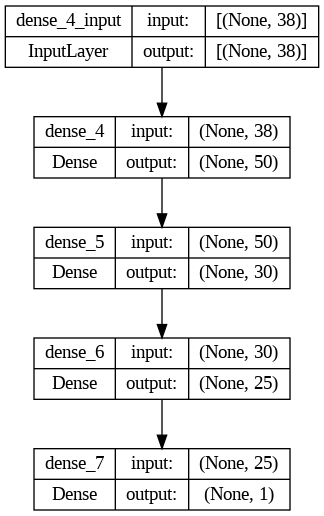

In [100]:
# Plot Layers
tf.keras.utils.plot_model(model_sequential, show_shapes = True)

## 6.2  - Model Training

In [101]:
#training
%%time
history_seq = model_sequential.fit(X_train_processed,
                                   y_train_bal,
                                   epochs= 100,
                                   validation_data=(X_val_processed, y_val),
                                   batch_size=32)

Epoch 1/100
553/553 [==============================] - 4s 3ms/step - loss: 0.3563 - accuracy: 0.8211 - val_loss: 0.3013 - val_accuracy: 0.8414
Epoch 2/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2884 - accuracy: 0.8513 - val_loss: 0.2832 - val_accuracy: 0.8431
Epoch 3/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2771 - accuracy: 0.8551 - val_loss: 0.2840 - val_accuracy: 0.8475
Epoch 4/100
553/553 [==============================] - 1s 3ms/step - loss: 0.2675 - accuracy: 0.8595 - val_loss: 0.2662 - val_accuracy: 0.8553
Epoch 5/100
553/553 [==============================] - 2s 4ms/step - loss: 0.2577 - accuracy: 0.8664 - val_loss: 0.2570 - val_accuracy: 0.8627
Epoch 6/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2488 - accuracy: 0.8762 - val_loss: 0.2606 - val_accuracy: 0.8705
Epoch 7/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2438 - accuracy: 0.8842 - val_loss: 0.2522 - val_accuracy: 0.8803

## 6.3 - Model Evaluation

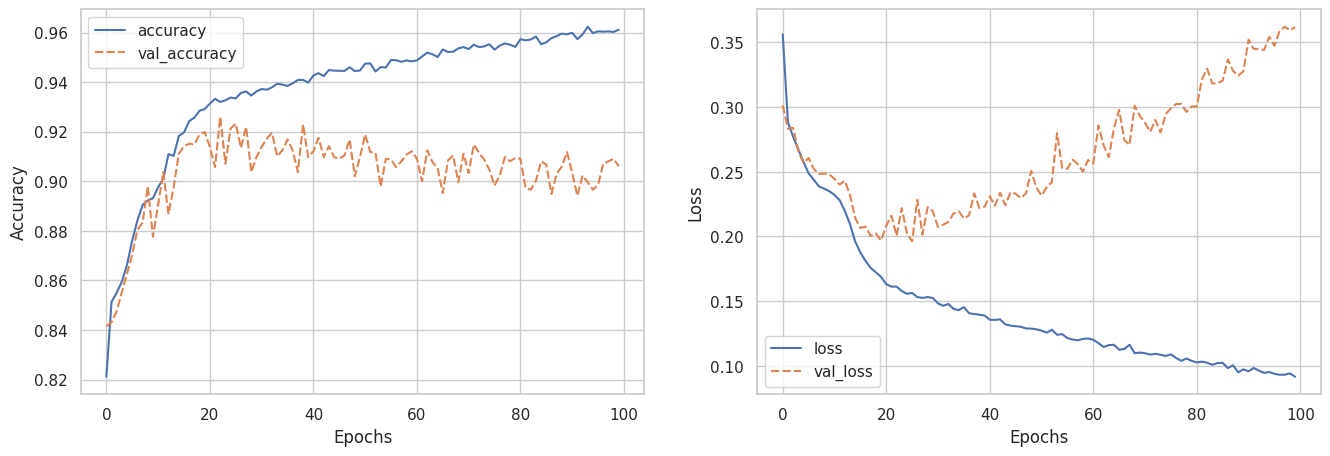

In [102]:
# Create DataFrame
history_seq_df = pd.DataFrame(history_seq.history)
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
sns.lineplot(data=history_seq_df[['accuracy', 'val_accuracy']], ax=ax[0])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
# Plot loss and validation loss on the second subplot (ax[1])
sns.lineplot(data=history_seq_df[['loss', 'val_loss']], ax=ax[1])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
plt.show()

Sepertinya pada model pertama yang dibuat ternyata memiliki akurasi yang bagus , namun pada validasi yang memburuk. Sehingga bisa dikatakan model yang pertama ini memiliki overfitting

In [116]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(X_test_processed)
y_pred_seq = np.where(y_pred_seq >= 0.5 , 1, 0 )

print(classification_report (y_test, y_pred_seq))

110/110 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1618
           1       0.90      0.92      0.91      1887

    accuracy                           0.90      3505
   macro avg       0.90      0.90      0.90      3505
weighted avg       0.90      0.90      0.90      3505



Berdasarkan model evaluasi, model pertama ini memiliki nilai akurasi sebesar 0.9 terhadap test

## 6.4 Model Improvement & Evaluation

Dari hasil model sebelumnya maka ada beberapa usulan yang dibuat untuk memperbaiki model

pada tahap ini saya mengasumsikan untuk menggunakan regularisasi dan juga dropout rate untuk mengatasi model yang overfitting.

Karena model diatas sepertinya terlalu kompleks maka dicoba untuk menggunakan total neuron yang lebih sedikit.

Dan juga untuk mempercepat waktu komputasi disini dilakukan pipelining data untuk ANN

Dan yang terakhir disini saya melakukan perubahan pada batch sehingga data training yang dihasilkan lebih banyak, hal ini dilakukan karena memungkinkan data untuk menghasilkan akurasi yang lebih tinggi

In [154]:
#model improvement

def model_sequen_1(input1, input2, input3, activate, epoch, regularization, dropout_rate, learning_rate, optimizer):
    model_sequential = Sequential()
    model_sequential.add(Dense(input1,
                               activation=activate,
                               kernel_initializer=tf.keras.initializers.HeNormal(seed),
                               input_shape=(38,),
                               kernel_regularizer=regularization)) # Hidden Layer 1
    model_sequential.add(Dropout(dropout_rate))

    model_sequential.add(Dense(input2,
                               activation=activate,
                               kernel_initializer=tf.keras.initializers.HeNormal(seed),
                               kernel_regularizer=regularization)) # Hidden Layer 2
    model_sequential.add(Dropout(dropout_rate))

    model_sequential.add(Dense(input3,
                               activation=activate,
                               kernel_initializer=tf.keras.initializers.HeNormal(seed),
                               kernel_regularizer=regularization)) # Hidden Layer 3
    model_sequential.add(Dropout(dropout_rate))

    model_sequential.add(Dense(1,
                               activation='sigmoid',
                               kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if optimizer == 'adam' else optimizer
    model_sequential.compile(loss='binary_crossentropy',
                             optimizer=optimizer,
                             metrics=['accuracy'])

    pipeline_seq_train = tf.data.Dataset.from_tensor_slices((X_train_processed, y_train_bal)).batch(20).shuffle(len(y_train_bal))
    pipeline_seq_val = tf.data.Dataset.from_tensor_slices((X_val_processed, y_val)).batch(20)
    model_seq_fin = model_sequential.fit(pipeline_seq_train, epochs=epoch, validation_data=pipeline_seq_val)
    model_seq_fin_df = pd.DataFrame(model_seq_fin.history)
    fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
    sns.lineplot(data=model_seq_fin_df[['accuracy', 'val_accuracy']], ax=ax[0])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    sns.lineplot(data=model_seq_fin_df[['loss', 'val_loss']], ax=ax[1])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    plt.show()

    return model_seq_fin


Epoch 1/100
884/884 [==============================] - 10s 7ms/step - loss: 0.4598 - accuracy: 0.8245 - val_loss: 0.3689 - val_accuracy: 0.8438
Epoch 2/100
884/884 [==============================] - 2s 2ms/step - loss: 0.3626 - accuracy: 0.8517 - val_loss: 0.3285 - val_accuracy: 0.8489
Epoch 3/100
884/884 [==============================] - 2s 2ms/step - loss: 0.3327 - accuracy: 0.8556 - val_loss: 0.3125 - val_accuracy: 0.8509
Epoch 4/100
884/884 [==============================] - 3s 3ms/step - loss: 0.3190 - accuracy: 0.8608 - val_loss: 0.3046 - val_accuracy: 0.8502
Epoch 5/100
884/884 [==============================] - 2s 3ms/step - loss: 0.3083 - accuracy: 0.8613 - val_loss: 0.2972 - val_accuracy: 0.8438
Epoch 6/100
884/884 [==============================] - 2s 2ms/step - loss: 0.3008 - accuracy: 0.8636 - val_loss: 0.2914 - val_accuracy: 0.8513
Epoch 7/100
884/884 [==============================] - 2s 2ms/step - loss: 0.2957 - accuracy: 0.8637 - val_loss: 0.2892 - val_accuracy: 0.849

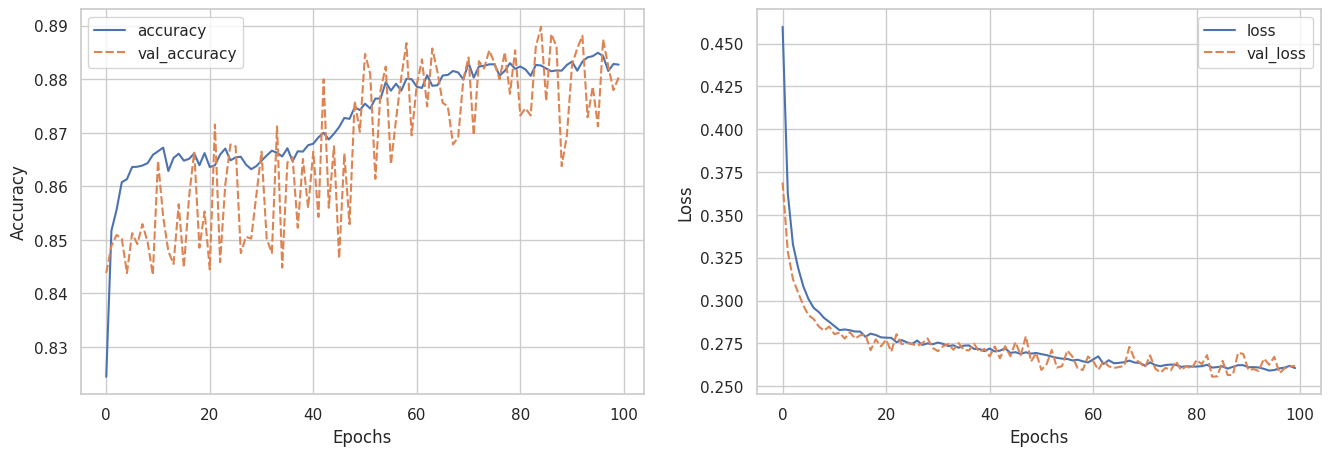

In [114]:
model_sequen_1(input1=33, input2=18, input3=7, activate='relu', epoch=100 , regularization=tf.keras.regularizers.l2(0.001), learning_rate=0.001 ,dropout_rate=0.1, optimizer='adam')

Dari hasil perbaikan diatas terlihat model memang sudah goodfit, namun nilai akurasi yang dihasilkan masing kurang terlalu baik. Disini mungkin penyebabnya karena model terlalu sederhana dimana digunakan droprate ditambahkan dengan regularisasi.

Dari hal tersebut disini saya memberikan nilai dropout = 0 , dan juga mengurangi nilai neuron yang tidak terlalu banyak pada masing masing hidden layer.

In [185]:
#model improvement

def model_sequen_2(input1, input2, input3, activate, epoch, regularization, dropout_rate, learning_rate, optimizer):
    model_sequential_2 = Sequential()
    model_sequential_2.add(Dense(input1,
                               activation=activate,
                               kernel_initializer=tf.keras.initializers.HeNormal(seed),
                               input_shape=(38,),
                               kernel_regularizer=regularization)) # Hidden Layer 1
    model_sequential_2.add(Dropout(dropout_rate))

    model_sequential_2.add(Dense(input2,
                               activation=activate,
                               kernel_initializer=tf.keras.initializers.HeNormal(seed),
                               kernel_regularizer=regularization)) # Hidden Layer 2
    model_sequential_2.add(Dropout(dropout_rate))

    model_sequential_2.add(Dense(input3,
                               activation=activate,
                               kernel_initializer=tf.keras.initializers.HeNormal(seed),
                               kernel_regularizer=regularization)) # Hidden Layer 3
    model_sequential_2.add(Dropout(dropout_rate))

    model_sequential_2.add(Dense(1,
                               activation='sigmoid',
                               kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer




    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if optimizer == 'adam' else optimizer
    model_sequential_2.compile(loss='binary_crossentropy',
                             optimizer=optimizer,
                             metrics=['accuracy'])



    pipeline_seq_train = tf.data.Dataset.from_tensor_slices((X_train_processed, y_train_bal)).batch(20).shuffle(len(y_train_bal))
    pipeline_seq_val = tf.data.Dataset.from_tensor_slices((X_val_processed, y_val)).batch(20)
    model_seq_fin = model_sequential_2.fit(pipeline_seq_train, epochs=epoch, validation_data=pipeline_seq_val)
    model_seq_fin_df = pd.DataFrame(model_seq_fin.history)
    fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
    sns.lineplot(data=model_seq_fin_df[['accuracy', 'val_accuracy']], ax=ax[0])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    sns.lineplot(data=model_seq_fin_df[['loss', 'val_loss']], ax=ax[1])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    plt.show()

    return model_sequential_2


Epoch 1/100
884/884 [==============================] - 4s 4ms/step - loss: 0.3629 - accuracy: 0.8490 - val_loss: 0.3277 - val_accuracy: 0.8465
Epoch 2/100
884/884 [==============================] - 2s 2ms/step - loss: 0.3102 - accuracy: 0.8580 - val_loss: 0.3313 - val_accuracy: 0.8584
Epoch 3/100
884/884 [==============================] - 2s 2ms/step - loss: 0.3030 - accuracy: 0.8578 - val_loss: 0.2986 - val_accuracy: 0.8600
Epoch 4/100
884/884 [==============================] - 2s 2ms/step - loss: 0.2979 - accuracy: 0.8577 - val_loss: 0.2914 - val_accuracy: 0.8550
Epoch 5/100
884/884 [==============================] - 2s 2ms/step - loss: 0.2903 - accuracy: 0.8599 - val_loss: 0.2852 - val_accuracy: 0.8634
Epoch 6/100
884/884 [==============================] - 3s 4ms/step - loss: 0.2858 - accuracy: 0.8665 - val_loss: 0.2804 - val_accuracy: 0.8712
Epoch 7/100
884/884 [==============================] - 2s 2ms/step - loss: 0.2835 - accuracy: 0.8661 - val_loss: 0.2908 - val_accuracy: 0.8563

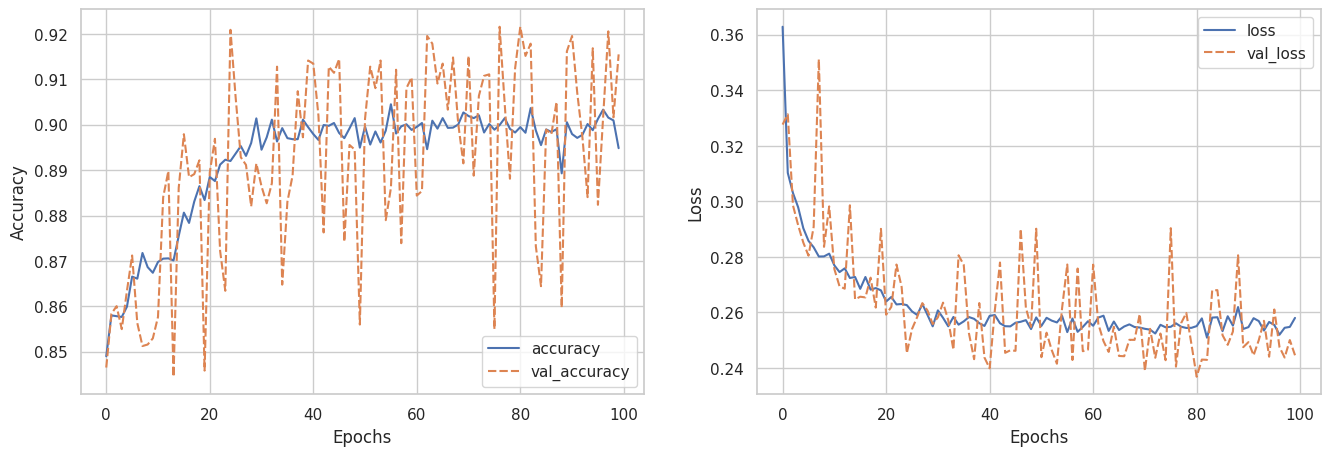

In [187]:
%%time
model_seq_fin = model_sequen_2(input1=30, input2=12, input3=3, activate='relu', epoch=100 , regularization=tf.keras.regularizers.l2(0.001), learning_rate=0.01, dropout_rate=0, optimizer='adam')

Dari hasil yang didapatkan, terlihat hasilnya sudah kurang lebih baik dibandingkan model pertama meskipun masih overfit. Untuk akurasi pada model ini juga terlihat meningkat , dimana nilai akurasinya yaitu sebesar 0.91. Dapat diakatan model mengalami peningkatan performa

110/110 [==============================] - 0s 2ms/step
Classification Report for model_sequential:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1618
           1       0.90      0.92      0.91      1887

    accuracy                           0.90      3505
   macro avg       0.90      0.90      0.90      3505
weighted avg       0.90      0.90      0.90      3505



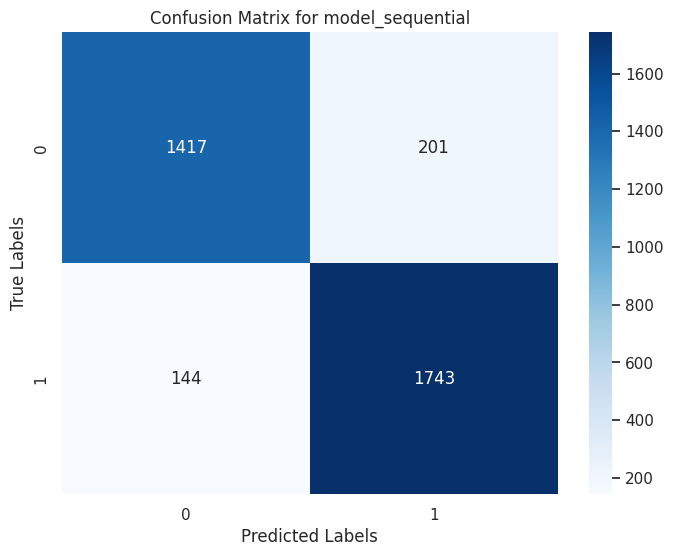

110/110 [==============================] - 0s 3ms/step
Classification Report for model_seq_fin:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1618
           1       0.90      0.93      0.92      1887

    accuracy                           0.91      3505
   macro avg       0.91      0.91      0.91      3505
weighted avg       0.91      0.91      0.91      3505



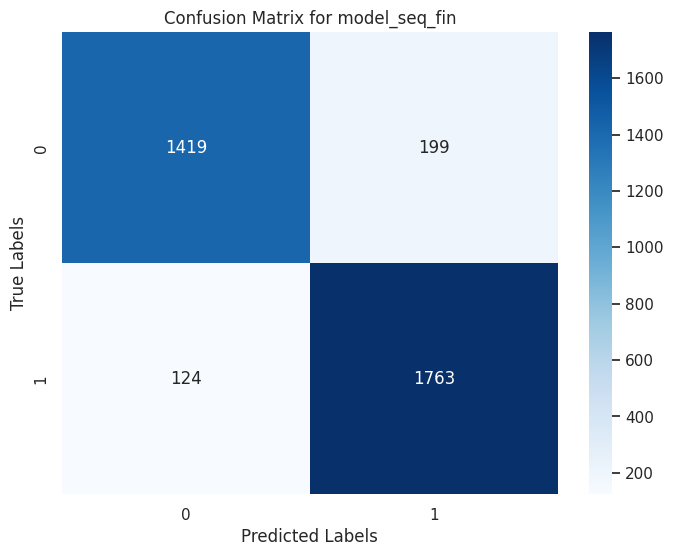

In [201]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_seq = model_sequential.predict(X_test_processed)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)


print("Classification Report for model_sequential:")
print(classification_report(y_test, y_pred_seq))


conf_matrix_seq = confusion_matrix(y_test, y_pred_seq)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_seq, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for model_sequential')
plt.show()


y_pred_seq_fin = model_seq_fin.predict(X_test_processed)
y_pred_seq_fin = np.where(y_pred_seq_fin >= 0.5, 1, 0)

print("Classification Report for model_seq_fin:")
print(classification_report(y_test, y_pred_seq_fin))


conf_matrix_seq_fin = confusion_matrix(y_test, y_pred_seq_fin)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_seq_fin, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for model_seq_fin')
plt.show()


Dari hasil diatas, selain model goodfit. Nilai akurasinya juga bertambah dari 0.90 menjadi 0.91 .

Hasil lain menunjukkan , model improvement salah memprediksi seorang yang seharusnya di prediksi churn tapi tidak dari 144 orang menjadi 123 orang

## 6.5 - Next Improvement

Meskipun hasil yang didapatkan baik, akan tetapi ada beberapa improvement yang dapat diusulkan. Dalam hal ini mungkin dapat dilakukan dengan mencari jumlah neuron dan hidden layer yang lebih tepat ,penggunakan initializer, dan regularisasi lainnya dan masih banyak lagi.

Selain itu bisa dilakukan pencarian hasil terbaik dengan menggunakan GridSearchCV dalama mencari nilai parameter yang lebih optimal.

Improvement yang dapat dilakukan dengan melakukan Feature engineering , seperti pilihan dalam imputasi missing values, dan juga dalam feature selection




# 7 - Functional API

Pada sesi ini dilakukan analisis pembuatan neural network dengan functional API. Functional API merupakan model ANN yang lebih fleksibel dan kuat untuk membangun model neural network.

Metrics yang digunakan pada analisis ini masih sama yaitu dengan matrics accuracy.

## 7.1 Model Definition

In [119]:
# Clear Session
seed = 13
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Disini definisi awal dari model digunakan 3 jalur ,
jalur 1 untuk 2 hidden layer dengan neuron masing masing 16, 8
jalur 2 untuk 2 hidden layer dengan neuron masing masing 10 dan 5

dan jalur terakhir hidden layer dengan neuron 24

asumsi ini diambil karena pada percobaan sequential api, percobaan menunjukkan total neuron yang kecil  dan juga penggunaan 3 hidden layer pada sebelumnya lebih menghasilkan model yang cukup baik dalam case ini.

In [120]:
input_layer = Input(shape=(38,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) #Hidden Layer 1
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

hidden_layer_3 = Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) #Hidden Layer 1
hidden_layer_4 = Dense(5, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_3)

hidden_layer_5 = Dense(24, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_4) #Hidden Layer 1


concat_layer = concatenate([input_layer, hidden_layer_2, hidden_layer_4 ])

output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

#compile
model_functional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_functional.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           624         ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 10)           390         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                              

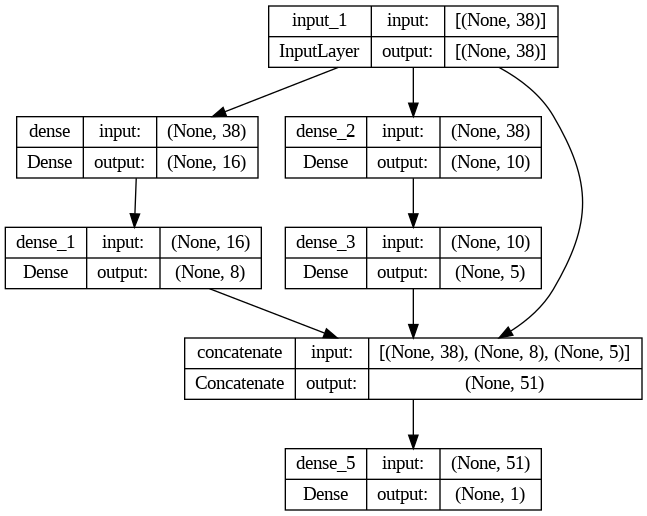

In [121]:
tf.keras.utils.plot_model(model_functional, show_shapes = True)

## 7.2 - Model Training

In [122]:
%%time
history_func = model_functional.fit(X_train_processed,
                                   y_train_bal,
                                   epochs= 100,
                                   validation_data=(X_val_processed, y_val),
                                   batch_size=32)

Epoch 1/100
553/553 [==============================] - 3s 3ms/step - loss: 0.3650 - accuracy: 0.8142 - val_loss: 0.2995 - val_accuracy: 0.8435
Epoch 2/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2868 - accuracy: 0.8495 - val_loss: 0.2904 - val_accuracy: 0.8469
Epoch 3/100
553/553 [==============================] - 2s 3ms/step - loss: 0.2809 - accuracy: 0.8504 - val_loss: 0.2848 - val_accuracy: 0.8455
Epoch 4/100
553/553 [==============================] - 2s 3ms/step - loss: 0.2774 - accuracy: 0.8496 - val_loss: 0.2800 - val_accuracy: 0.8452
Epoch 5/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2753 - accuracy: 0.8548 - val_loss: 0.2869 - val_accuracy: 0.8560
Epoch 6/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2741 - accuracy: 0.8531 - val_loss: 0.2788 - val_accuracy: 0.8458
Epoch 7/100
553/553 [==============================] - 1s 2ms/step - loss: 0.2738 - accuracy: 0.8538 - val_loss: 0.2936 - val_accuracy: 0.8763

## 7.3 - Model Evaluation

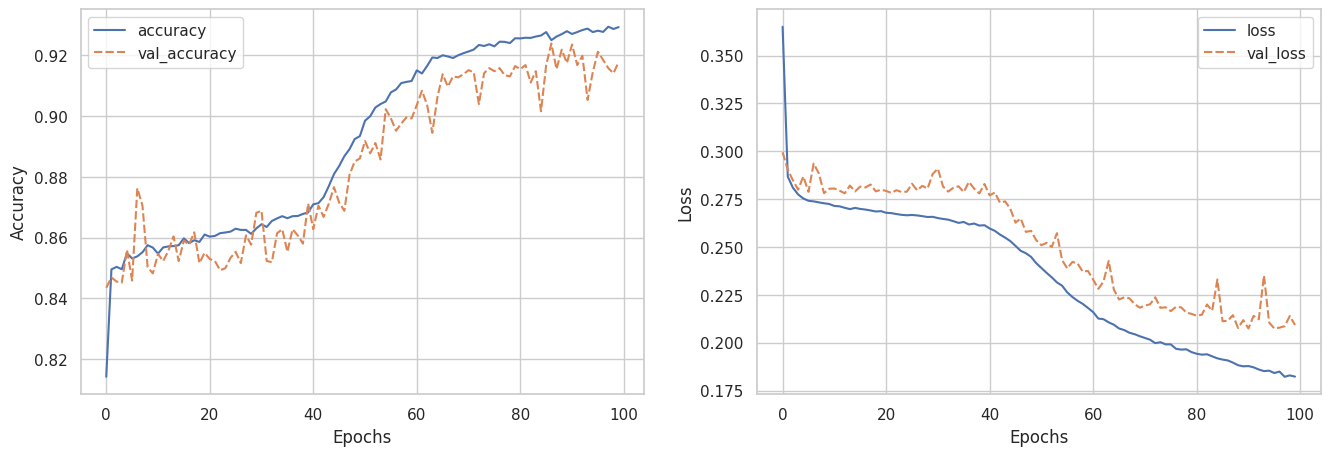

In [123]:
# Create DataFrame
history_func_df = pd.DataFrame(history_func.history)
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
sns.lineplot(data=history_func_df[['accuracy', 'val_accuracy']], ax=ax[0])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
sns.lineplot(data=history_func_df[['loss', 'val_loss']], ax=ax[1])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
plt.show()



Dari hasil test terlihat model tidak terlalu overfit, dengan akurasi yang lumayan baik

In [124]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_processed)
y_pred_func = np.where(y_pred_func >= 0.5 , 1, 0)

print(classification_report(y_test, y_pred_func))

110/110 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1618
           1       0.91      0.93      0.92      1887

    accuracy                           0.91      3505
   macro avg       0.91      0.91      0.91      3505
weighted avg       0.91      0.91      0.91      3505



Disini terlihat akurasi pada data test adalah 0.91

## 7.4 Model Improvement & Evaluation

Asumsi yang dilakukan untuk perbaikan overfit dan akurasi yaitu dengan menggunakan regularisasi , mengatur nilai neuron pada masing maisng hidden layer , penggunaan nilai batch yaitu dengan nilai 20 dan learning rate.

In [126]:
def model_functional_1(input1, input2, input3, input4, input5, activate, epoch, regularization=None, learning_rate=0.001, optimizer='adam'):
    input_layer = Input(shape=(38,))
    hidden_layer_1 = Dense(input1, activation=activate, kernel_initializer=tf.keras.initializers.HeNormal(seed), kernel_regularizer=regularization)(input_layer) #Hidden Layer 1
    hidden_layer_2 = Dense(input2, activation=activate, kernel_initializer=tf.keras.initializers.HeNormal(seed), kernel_regularizer=regularization)(hidden_layer_1)

    hidden_layer_3 = Dense(input3, activation=activate, kernel_initializer=tf.keras.initializers.HeNormal(seed), kernel_regularizer=regularization)(input_layer) #Hidden Layer 1
    hidden_layer_4 = Dense(input4, activation=activate, kernel_initializer=tf.keras.initializers.HeNormal(seed), kernel_regularizer=regularization)(hidden_layer_3)

    hidden_layer_5 = Dense(input5, activation=activate, kernel_initializer=tf.keras.initializers.HeNormal(seed), kernel_regularizer=regularization)(hidden_layer_4) #Hidden Layer 1

    concat_layer = concatenate([input_layer, hidden_layer_2, hidden_layer_4])

    output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if optimizer == 'adam' else optimizer
    model_functional = Model(inputs=input_layer, outputs=output_layer)

    #compile
    model_functional.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    pipeline_seq_train = tf.data.Dataset.from_tensor_slices((X_train_processed, y_train_bal)).batch(20).shuffle(len(y_train_bal))
    pipeline_seq_val = tf.data.Dataset.from_tensor_slices((X_val_processed, y_val)).batch(20)

    model_func_fin = model_functional.fit(pipeline_seq_train, epochs=epoch, validation_data=pipeline_seq_val)

    model_func_fin_df = pd.DataFrame(model_func_fin.history)
    fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
    sns.lineplot(data=model_func_fin_df[['accuracy', 'val_accuracy']], ax=ax[0])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    sns.lineplot(data=model_func_fin_df[['loss', 'val_loss']], ax=ax[1])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    plt.show()


Epoch 1/100
884/884 [==============================] - 5s 3ms/step - loss: 0.3299 - accuracy: 0.8483 - val_loss: 0.3022 - val_accuracy: 0.8540
Epoch 2/100
884/884 [==============================] - 2s 2ms/step - loss: 0.2900 - accuracy: 0.8578 - val_loss: 0.2858 - val_accuracy: 0.8448
Epoch 3/100
884/884 [==============================] - 4s 4ms/step - loss: 0.2802 - accuracy: 0.8612 - val_loss: 0.2809 - val_accuracy: 0.8705
Epoch 4/100
884/884 [==============================] - 3s 4ms/step - loss: 0.2668 - accuracy: 0.8667 - val_loss: 0.2621 - val_accuracy: 0.8624
Epoch 5/100
884/884 [==============================] - 2s 2ms/step - loss: 0.2600 - accuracy: 0.8739 - val_loss: 0.2581 - val_accuracy: 0.8746
Epoch 6/100
884/884 [==============================] - 2s 2ms/step - loss: 0.2535 - accuracy: 0.8790 - val_loss: 0.2519 - val_accuracy: 0.8861
Epoch 7/100
884/884 [==============================] - 3s 3ms/step - loss: 0.2517 - accuracy: 0.8834 - val_loss: 0.2516 - val_accuracy: 0.8796

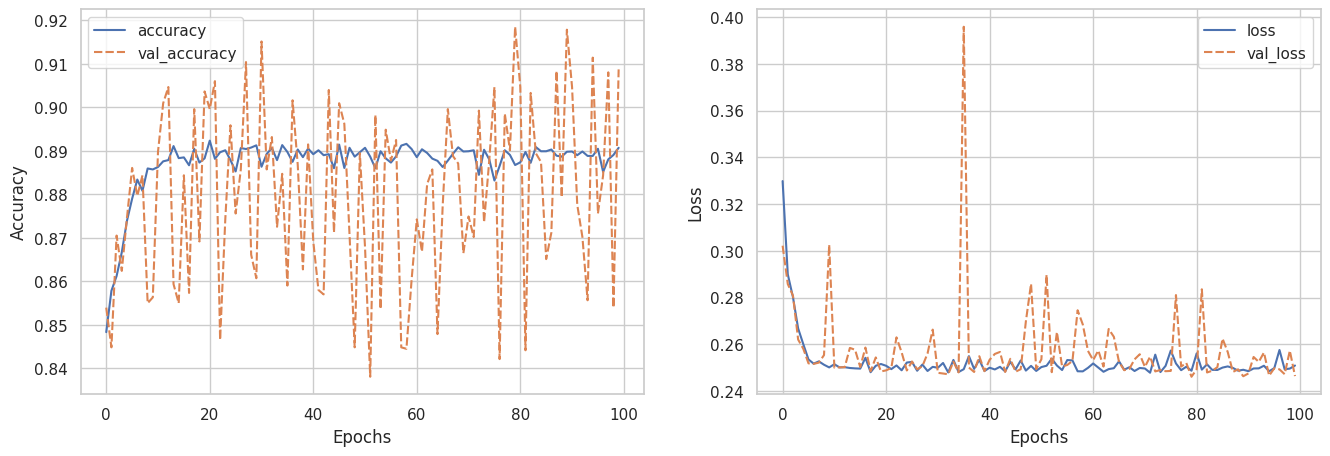

CPU times: user 4min 16s, sys: 8 s, total: 4min 24s
Wall time: 5min 50s


In [128]:
%%time
model_functional_1(16, 8, 10, 5, 24, 'relu', 100 , regularization=tf.keras.regularizers.l2(0.001), learning_rate=0.01, optimizer='adam')

Pada percobaan pertama meskipun data bisa dikatakan goodfit namun hasil akurasi yang tidak lebih baik dari hasil pertama. Hal ini mungkin karena terlalu banyak regularisasi dan jumlah neuronnya

Karena hal tersebut disini saya mencoba mengganti regularisasinya menjadi batchnormal, dan juga jumlah neuronnya dikurangi

Epoch 1/100
884/884 [==============================] - 13s 5ms/step - loss: 0.3299 - accuracy: 0.8408 - val_loss: 0.2997 - val_accuracy: 0.8607
Epoch 2/100
884/884 [==============================] - 3s 4ms/step - loss: 0.2802 - accuracy: 0.8607 - val_loss: 0.2874 - val_accuracy: 0.8577
Epoch 3/100
884/884 [==============================] - 3s 3ms/step - loss: 0.2535 - accuracy: 0.8888 - val_loss: 0.2827 - val_accuracy: 0.8617
Epoch 4/100
884/884 [==============================] - 3s 4ms/step - loss: 0.2345 - accuracy: 0.9042 - val_loss: 0.2103 - val_accuracy: 0.9165
Epoch 5/100
884/884 [==============================] - 3s 3ms/step - loss: 0.2231 - accuracy: 0.9085 - val_loss: 0.2234 - val_accuracy: 0.9131
Epoch 6/100
884/884 [==============================] - 4s 5ms/step - loss: 0.2169 - accuracy: 0.9133 - val_loss: 0.2138 - val_accuracy: 0.9097
Epoch 7/100
884/884 [==============================] - 3s 3ms/step - loss: 0.2125 - accuracy: 0.9146 - val_loss: 0.2333 - val_accuracy: 0.897

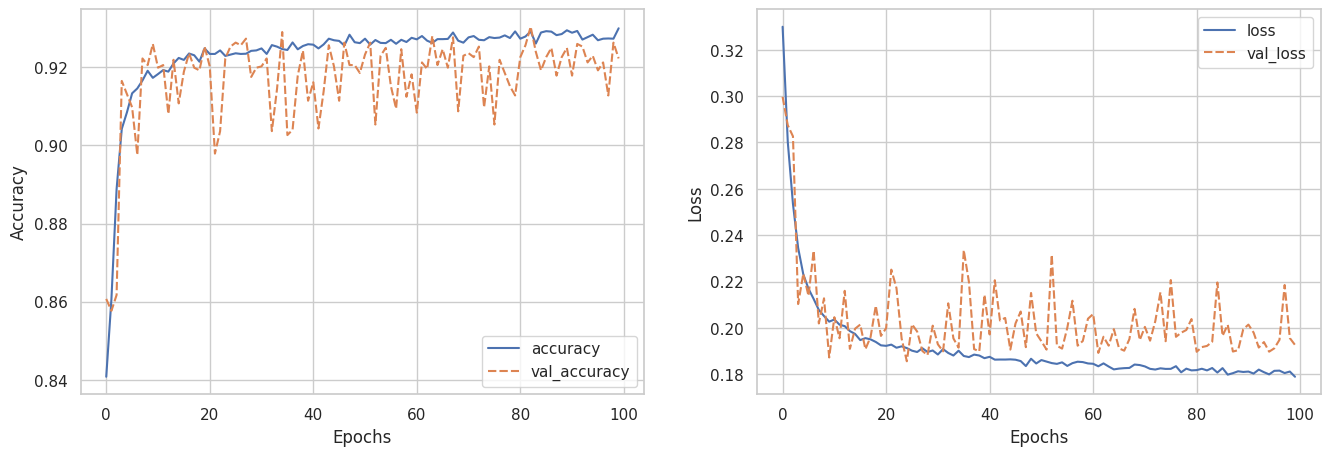

In [132]:


def model_functional_2(input1, input2, input3, input4, input5, activate, epoch, regularization, learning_rate, optimizer):
    input_layer = Input(shape=(38,))
    hidden_layer_1 = Dense(input1, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) # Hidden Layer 1
    hidden_layer_1 = BatchNormalization()(hidden_layer_1)

    hidden_layer_2 = Dense(input2, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
    hidden_layer_2 = BatchNormalization()(hidden_layer_2)

    hidden_layer_3 = Dense(input3, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) # Hidden Layer 3
    hidden_layer_3 = BatchNormalization()(hidden_layer_3)

    hidden_layer_4 = Dense(input4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_3)
    hidden_layer_4 = BatchNormalization()(hidden_layer_4)

    hidden_layer_5 = Dense(input5, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_4) # Hidden Layer 5
    hidden_layer_5 = BatchNormalization()(hidden_layer_5)

    concat_layer = concatenate([input_layer, hidden_layer_2, hidden_layer_4, hidden_layer_5])

    output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

    model_functional = Model(inputs=input_layer, outputs=output_layer)


    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if optimizer == 'adam' else optimizer
    model_functional.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    pipeline_seq_train = tf.data.Dataset.from_tensor_slices((X_train_processed, y_train_bal)).batch(20).shuffle(len(y_train_bal))
    pipeline_seq_val = tf.data.Dataset.from_tensor_slices((X_val_processed, y_val)).batch(20)

    model_func_fin = model_functional.fit(pipeline_seq_train, epochs=epoch, validation_data=pipeline_seq_val)

    model_func_fin_df = pd.DataFrame(model_func_fin.history)
    fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
    sns.lineplot(data=model_func_fin_df[['accuracy', 'val_accuracy']], ax=ax[0])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    sns.lineplot(data=model_func_fin_df[['loss', 'val_loss']], ax=ax[1])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    plt.show()

# Usage example
model_functional_2(input1=16, input2=8, input3=3, input4=5, input5=12, activate='relu', epoch=100,
                   regularization=None, learning_rate=0.01, optimizer='adam')


Dari hasil diatas ternyata nilai akurasinya lumayan baik dibandingkan model pertama, sedangkan model juga bisa dikatakan hampir goodfit.  Terlihat sebenarnya sebelum epoch mencapai 100 hasilnya sudah baik. Dengan kata lain ada kemungkinan bisa didapatkan model dengan training yang lebih cepat.

Karena hasil yang didapatkan lebih baik, disini dilakukan earlystopping untuk mendapatkan hasil yang lebih baik

In [135]:
from tensorflow.keras.callbacks import EarlyStopping

In [189]:
def model_functional_3(input1, input2, input3, input4, input5, activate, epoch, regularization, learning_rate, optimizer):
    input_layer = Input(shape=(38,))
    hidden_layer_1 = Dense(input1, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) # Hidden Layer 1
    hidden_layer_1 = BatchNormalization()(hidden_layer_1)

    hidden_layer_2 = Dense(input2, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
    hidden_layer_2 = BatchNormalization()(hidden_layer_2)

    hidden_layer_3 = Dense(input3, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) # Hidden Layer 3
    hidden_layer_3 = BatchNormalization()(hidden_layer_3)

    hidden_layer_4 = Dense(input4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_3)
    hidden_layer_4 = BatchNormalization()(hidden_layer_4)

    hidden_layer_5 = Dense(input5, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_4) # Hidden Layer 5
    hidden_layer_5 = BatchNormalization()(hidden_layer_5)

    concat_layer = concatenate([input_layer, hidden_layer_2, hidden_layer_4, hidden_layer_5])

    output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

    model_functional_3 = Model(inputs=input_layer, outputs=output_layer)


    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if optimizer == 'adam' else optimizer
    model_functional_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    pipeline_seq_train = tf.data.Dataset.from_tensor_slices((X_train_processed, y_train_bal)).batch(20).shuffle(len(y_train_bal))
    pipeline_seq_val = tf.data.Dataset.from_tensor_slices((X_val_processed, y_val)).batch(20)

    model_func_fin = model_functional_3.fit(pipeline_seq_train, epochs=epoch, validation_data=pipeline_seq_val, callbacks=[early_stopping])



    model_func_fin_df = pd.DataFrame(model_func_fin.history)
    fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
    sns.lineplot(data=model_func_fin_df[['accuracy', 'val_accuracy']], ax=ax[0])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    sns.lineplot(data=model_func_fin_df[['loss', 'val_loss']], ax=ax[1])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    plt.show()

    return model_functional_3

Epoch 1/100
884/884 [==============================] - 7s 4ms/step - loss: 0.3294 - accuracy: 0.8422 - val_loss: 0.2941 - val_accuracy: 0.8475
Epoch 2/100
884/884 [==============================] - 8s 9ms/step - loss: 0.2749 - accuracy: 0.8695 - val_loss: 0.2593 - val_accuracy: 0.8911
Epoch 3/100
884/884 [==============================] - 4s 4ms/step - loss: 0.2520 - accuracy: 0.8912 - val_loss: 0.2252 - val_accuracy: 0.9145
Epoch 4/100
884/884 [==============================] - 4s 4ms/step - loss: 0.2286 - accuracy: 0.9094 - val_loss: 0.2200 - val_accuracy: 0.9158
Epoch 5/100
884/884 [==============================] - 3s 4ms/step - loss: 0.2187 - accuracy: 0.9128 - val_loss: 0.2090 - val_accuracy: 0.9189
Epoch 6/100
884/884 [==============================] - 4s 5ms/step - loss: 0.2144 - accuracy: 0.9137 - val_loss: 0.2069 - val_accuracy: 0.9155
Epoch 7/100
884/884 [==============================] - 3s 4ms/step - loss: 0.2099 - accuracy: 0.9176 - val_loss: 0.2400 - val_accuracy: 0.9016

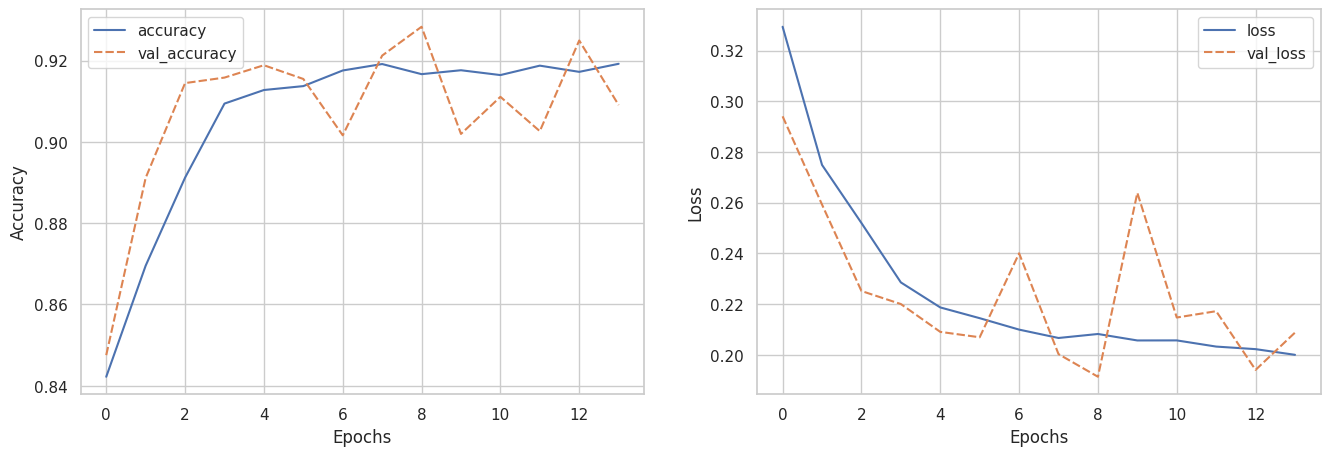

CPU times: user 1min 6s, sys: 1.42 s, total: 1min 7s
Wall time: 1min 15s


In [190]:
%%time
np.random.seed(13)
tf.random.set_seed(13)
model_func_fin = model_functional_3(input1=16, input2=8, input3=3, input4=5, input5=12, activate='relu', epoch=100,
                   regularization=None, learning_rate=0.01, optimizer='adam')

Didapatkan hasil baru menggunakan early stopping, waktu komputasi model hanya memakan waktu 1 min 15 s , dimana model sudah goodfit dengan akurasi sebesar 0.92

110/110 [==============================] - 0s 2ms/step
Classification Report for model_functional:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1618
           1       0.91      0.93      0.92      1887

    accuracy                           0.91      3505
   macro avg       0.91      0.91      0.91      3505
weighted avg       0.91      0.91      0.91      3505



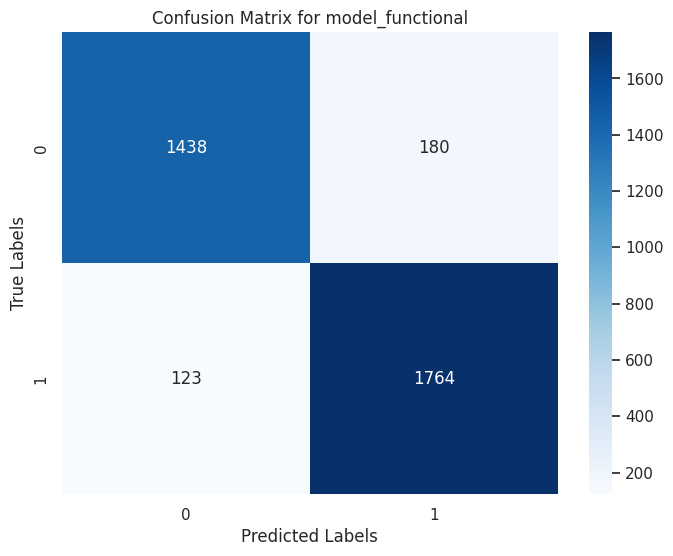

110/110 [==============================] - 0s 3ms/step
Classification Report for model_func_fin:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1618
           1       0.90      0.95      0.93      1887

    accuracy                           0.92      3505
   macro avg       0.92      0.91      0.92      3505
weighted avg       0.92      0.92      0.92      3505



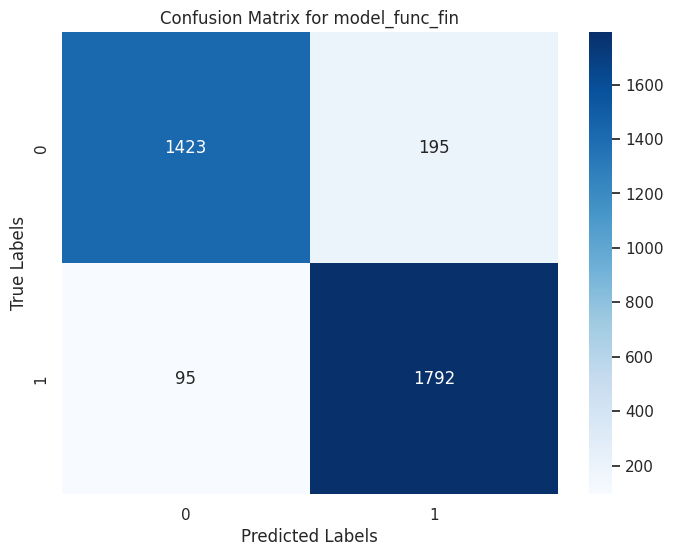

In [202]:
y_pred_func = model_functional.predict(X_test_processed)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)


print("Classification Report for model_functional:")
print(classification_report(y_test, y_pred_func))


conf_matrix_func = confusion_matrix(y_test, y_pred_func)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_func, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for model_functional')
plt.show()


y_pred_func_fin = model_func_fin.predict(X_test_processed)
y_pred_func_fin = np.where(y_pred_func_fin >= 0.5, 1, 0)


print("Classification Report for model_func_fin:")
print(classification_report(y_test, y_pred_func_fin))


conf_matrix_func_fin = confusion_matrix(y_test, y_pred_func_fin)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_func_fin, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for model_func_fin')
plt.show()

Dari hasil diatas, selain model lebih cepat dalam waktu komputasinya. Nilai akurasinya juga bertambah dari 0.91 menjadi 0.92 .

Hasil lain menunjukkan , model improvement salah memprediksi seorang yang seharusnya di prediksi churn tapi tidak dari 123 orang menjadi 95 orang

## 7.5 - Next Improvement

Meskipun hasil yang didapatkan baik, akan tetapi ada beberapa improvement yang dapat diusulkan. Dalam hal ini mungkin dapat dilakukan dengan mencari jumlah neuron dan hidden layer yang lebih tepat ,penggunakan initializer, dan regularisasi lainnya dan masih banyak lagi.

Selain itu bisa dilakukan pencarian hasil terbaik dengan menggunakan GridSearchCV dalama mencari nilai parameter yang lebih optimal.

Improvement yang dapat dilakukan dengan melakukan Feature engineering , seperti pilihan dalam imputasi missing values, dan juga dalam feature selection

## 7.6 Comparison Sequential API & Functional API

Dari analisis yang sebelumnya sudah dilakukan, ternyata model dengan arsitektur Functional API merupakan yang paling baik dimana mempunyai akurasi yang lebih tinggi dengan waktu komputasi tranining yang lebih cepat dibandingkan arsitektur Sequential API. Terlihat pada hasil sebelumnya Functional API mempunyai akurasi sebesar 0.92 sedangkan Sequential API mempunyai akurasi sebesar 0.91 .


Dalam bisnis, model dengan akurasi yang tinggi, seperti yang dapat memprediksi dengan tepat sebesar 92%, sangat berharga dalam mengidentifikasi pelanggan yang berpotensi churn. Dengan akurasi yang lebih tinggi, bisnis dapat menghindari kesalahan dalam mengidentifikasi pelanggan yang sebenarnya tidak akan berhenti berlangganan dan dapat lebih fokus pada pelanggan yang memang berisiko churn. Selain itu, model dengan akurasi tinggi juga membantu bisnis dalam mengoptimasi strategi pemasaran. Bisnis dapat menggunakan hasil prediksi model untuk mengidentifikasi segmentasi pelanggan yang berbeda dan menyesuaikan strategi pemasaran sesuai dengan kebutuhan dan preferensi pelanggan. Hal ini memungkinkan bisnis untuk meningkatkan retensi pelanggan dan memberikan layanan yang lebih efektif

# 8 - Model Saving

In [203]:
# Save Pipeline


import pickle

with open('pipeline.pkl', 'wb') as file_1 :
  pickle.dump(preprocessing_pipeline, file_1)

In [204]:
# Freze model
model_seq_fin.trainable = False
model_seq_fin.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 30)                1170      
                                                                 
 dropout_51 (Dropout)        (None, 30)                0         
                                                                 
 dense_129 (Dense)           (None, 12)                372       
                                                                 
 dropout_52 (Dropout)        (None, 12)                0         
                                                                 
 dense_130 (Dense)           (None, 3)                 39        
                                                                 
 dropout_53 (Dropout)        (None, 3)                 0         
                                                                 
 dense_131 (Dense)           (None, 1)               

In [205]:
model_func_fin.trainable = False
model_seq_fin.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 30)                1170      
                                                                 
 dropout_51 (Dropout)        (None, 30)                0         
                                                                 
 dense_129 (Dense)           (None, 12)                372       
                                                                 
 dropout_52 (Dropout)        (None, 12)                0         
                                                                 
 dense_130 (Dense)           (None, 3)                 39        
                                                                 
 dropout_53 (Dropout)        (None, 3)                 0         
                                                                 
 dense_131 (Dense)           (None, 1)               

In [206]:
# Save ANN model

model_seq_fin.save('model_sequential_final.h5')
model_func_fin.save('model_functional_final.h5')


# 9 - Model Inferencing

In [220]:
with open ('pipeline.pkl' , 'rb') as file_a:
    pipeline = pickle.load(file_a)

model_sequential_final = tf.keras.models.load_model('model_sequential_final.h5')
model_functional_final = tf.keras.models.load_model('model_functional_final.h5')

In [229]:
#membuat data baru
data_inf = {
            'age' : 37,
            'gender' : 'M',
            'region_category' : 'Town',
            'membership_category' : 'Platinum Membership',
            'joining_date' : '2015-05-05',
            'joined_through_referral' : 'Yes',
            'preferred_offer_types' : 'Gift Vouchers/Coupons',
            'medium_of_operation' : 'Desktop',
            'internet_option' :'Wi-Fi',
            'last_visit_time' : 666 ,
            'days_since_last_login' : 27,
            'avg_time_spent' : 555,
            'avg_transaction_value' : 30333.33,
            'avg_frequency_login_days' : 12.0,
            'points_in_wallet' : 777.777,
            'used_special_discount' : 'No',
            'offer_application_preference' : 'Yes',
            'past_complaint' : 'Yes',
            'complaint_status' : 'Solved',
            'feedback' : 'Reasonable Price'
}
data_inf = pd.DataFrame([data_inf])
data_inf

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,37,M,Town,Platinum Membership,2015-05-05,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,666,27,555,30333.33,12.0,777.777,No,Yes,Yes,Solved,Reasonable Price


In [230]:
data_inf_transform = pipeline.transform(data_inf)

In [233]:
y_predict_seq = model_sequential_final.predict(data_inf_transform)
y_pred_seq = np.where(y_predict_seq >= 0.5, 1, 0)

y_predict_func = model_functional_final.predict(data_inf_transform)
y_pred_func = np.where(y_predict_func >= 0.5, 1, 0)

1/1 [==============================] - 0s 54ms/step


In [237]:
print("Hasil Prediksi Model Sequential:")
print(y_pred_seq)

print("Hasil Prediksi Model Functional:")
print(y_pred_func)

Hasil Prediksi Model Sequential:
[[0]]
Hasil Prediksi Model Functional:
[[0]]


# 10 - Kesimpulan


Dari hasil analisis yang telah dilakukan ada beberapa insight yaitu, customer dengan days_since_last login, rata rata transaski yang kecil dibawah 60.000, point wallet yang rendah mempunyai tingkat churn yang tinggi. Selain itu customer yang memberikan feedback negative, tidak memiliki membership atau basic membership juga memiliki tingkat churn yang tinggi. Dari pengetahuan tersebut kedepannya perusahaan dapat memberikan strategi yang efektif dalam permasalahan hal ini. Selain itu Model yang dilakukan dengan ANN, entah itu sequential API ataupun Functional API masing masing sudah memberikan hasil yang baik yaitu model sudah dapat memberikan akurasi sebesar 91 % dan 92 % dalam memprediksi data, dimana Functional API dalam hal ini lebih baik dibandingkan Sequential API